In [1]:
import os
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

sc.settings.set_figure_params(dpi=80, facecolor='white')
#sc.logging.print_header()

# create AnnData  used to analyze and work with single cell
barcodes.tsv cells barcodes(rows)
genes.ts  gene ids andnames(columns)
matrix.mtx gene expression (values)
                            

In [2]:
import scanpy as sc
import pandas as pd

unfilt_folderpath ="counts_unfiltered/cellranger/"
filt_folderpath="counts_filtered/"
#load files into anndata object
adata = sc.read_10x_mtx(
    filt_folderpath,
    var_names="gene_symbols",  # or "gene_ids"
    cache=False,
    prefix=""  
)

adata


AnnData object with n_obs × n_vars = 1223 × 60623
    var: 'gene_ids'

x -> gene expression data (matrix)
obs and var -> gene names and ids, barcodes and metadata
obsm, varm and uns ->dimensionality reduction or clustering

In [3]:
print(adata.shape)
#1223 cells, 60623 genes

(1223, 60623)


In [4]:
print(adata.obs.info())
print("")
print("###############################################")
print("")
print(adata.var.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1223 entries, AAACCCAAGGAGAGTA-1 to TTTGTTGCAATTAGGA-1
Empty DataFrame
None

###############################################

<class 'pandas.core.frame.DataFrame'>
Index: 60623 entries, DDX11L1 to AC213203.1
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gene_ids  60623 non-null  object
dtypes: object(1)
memory usage: 947.2+ KB
None


In [5]:
#inspect list of cwllnames
adata.obs.head()

Empty DataFrame
Columns: []
Index: [AAACCCAAGGAGAGTA-1, AAACGCTTCAGCCCAG-1, AAAGAACAGACGACTG-1, AAAGAACCAATGGCAG-1, AAAGAACGTCTGCAAT-1]

In [6]:
#list gene names
adata.var.head()

gene_ids
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1

In [7]:
#sparse row data
adata.X

<Compressed Sparse Column sparse matrix of dtype 'float32'
	with 3246957 stored elements and shape (1223, 60623)>

scanpy cell ids by genes
seurat genes by cells

In [8]:
#create a df
adata.to_df()

DDX11L1  WASH7P  MIR6859-1  MIR1302-2HG  MIR1302-2  \
AAACCCAAGGAGAGTA-1      0.0     0.0        0.0          0.0        0.0   
AAACGCTTCAGCCCAG-1      0.0     0.0        0.0          0.0        0.0   
AAAGAACAGACGACTG-1      0.0     0.0        0.0          0.0        0.0   
AAAGAACCAATGGCAG-1      0.0     0.0        0.0          0.0        0.0   
AAAGAACGTCTGCAAT-1      0.0     0.0        0.0          0.0        0.0   
...                     ...     ...        ...          ...        ...   
TTTCCTCTCTCTTGCG-1      0.0     0.0        0.0          0.0        0.0   
TTTGATCTCTTTGGAG-1      0.0     0.0        0.0          0.0        0.0   
TTTGGTTAGTAACCTC-1      0.0     0.0        0.0          0.0        0.0   
TTTGGTTGTAGAATAC-1      0.0     0.0        0.0          0.0        0.0   
TTTGTTGCAATTAGGA-1      0.0     0.0        0.0          0.0        0.0   

                    FAM138A  OR4G4P  OR4G11P  OR4F5  AL627309.1  ...  \
AAACCCAAGGAGAGTA-1      0.0     0.0      0.0    0.0         0.0  ...   
AAACGCTTCAGCCCAG-1      0.0     0.0      0.0    0.0         0.0  ...   
AAAGAACAGACGACTG-1      0.0     0.0      0.0    0.0         0.0  ...   
AAAGAACCAATGGCAG-1      0.0     0.0      0.0    0.0         0.0  ...   
AAAGAACGTCTGCAAT-1      0.0     0.0      0.0    0.0         0.0  ...   
...                     ...     ...      ...    ...         ...  ...   
TTTCCTCTCTCTTGCG-1      0.0     0.0      0.0    0.0         0.0  ...   
TTTGATCTCTTTGGAG-1      0.0     0.0      0.0    0.0         0.0  ...   
TTTGGTTAGTAACCTC-1      0.0     0.0      0.0    0.0         0.0  ...   
TTTGGTTGTAGAATAC-1      0.0     0.0      0.0    0.0         0.0  ...   
TTTGTTGCAATTAGGA-1      0.0     0.0      0.0    0.0         0.0  ...   

                    AC004556.1  AC004556.4  AC004556.2  AC233755.2  \
AAACCCAAGGAGAGTA-1         0.0         0.0         0.0         0.0   
AAACGCTTCAGCCCAG-1         0.0         0.0         0.0         0.0   
AAAGAACAGACGACTG-1         0.0         0.0         0.0         0.0   
AAAGAACCAATGGCAG-1         0.0         0.0         0.0         0.0   
AAAGAACGTCTGCAAT-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTTCCTCTCTCTTGCG-1         0.0         0.0         0.0         0.0   
TTTGATCTCTTTGGAG-1         0.0         0.0         0.0         0.0   
TTTGGTTAGTAACCTC-1         0.0         0.0         0.0         0.0   
TTTGGTTGTAGAATAC-1         0.0         0.0         0.0         0.0   
TTTGTTGCAATTAGGA-1         0.0         0.0         0.0         0.0   

                    AC233755.1  AC240274.1  U1-14  U1-15  AC213203.2  \
AAACCCAAGGAGAGTA-1         0.0         0.0    0.0    0.0         0.0   
AAACGCTTCAGCCCAG-1         0.0         0.0    0.0    0.0         0.0   
AAAGAACAGACGACTG-1         0.0         0.0    0.0    0.0         0.0   
AAAGAACCAATGGCAG-1         0.0         0.0    0.0    0.0         0.0   
AAAGAACGTCTGCAAT-1         0.0         0.0    0.0    0.0         0.0   
...                        ...         ...    ...    ...         ...   
TTTCCTCTCTCTTGCG-1         0.0         0.0    0.0    0.0         0.0   
TTTGATCTCTTTGGAG-1         0.0         0.0    0.0    0.0         0.0   
TTTGGTTAGTAACCTC-1         0.0         0.0    0.0    0.0         0.0   
TTTGGTTGTAGAATAC-1         0.0         0.0    0.0    0.0         0.0   
TTTGTTGCAATTAGGA-1         0.0         0.0    0.0    0.0         0.0   

                    AC213203.1  
AAACCCAAGGAGAGTA-1         0.0  
AAACGCTTCAGCCCAG-1         0.0  
AAAGAACAGACGACTG-1         0.0  
AAAGAACCAATGGCAG-1         0.0  
AAAGAACGTCTGCAAT-1         0.0  
...                        ...  
TTTCCTCTCTCTTGCG-1         0.0  
TTTGATCTCTTTGGAG-1         0.0  
TTTGGTTAGTAACCTC-1         0.0  
TTTGGTTGTAGAATAC-1         0.0  
TTTGTTGCAATTAGGA-1         0.0  

[1223 rows x 60623 columns]

In [9]:
adata
#X matrix n_obs × n_vars = 1223 × 60623
#var: gene_ids, 
adata.raw = adata

# quality control on AnnData objects
top genes with the highest mean fraction over all cells

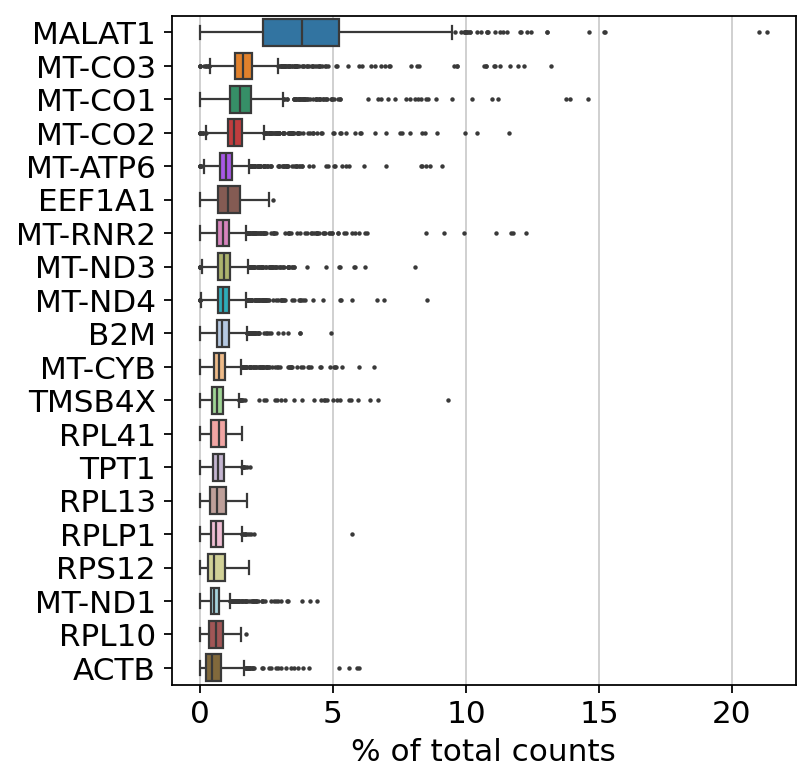

In [10]:


sc.pl.highest_expr_genes(adata, n_top=20)

In [11]:
#copy a for QC data stats

In [12]:
adata_QC = adata.copy()
sc.pp.calculate_qc_metrics(adata_QC, percent_top=None, log1p=False, inplace=True)

In [13]:
adata_QC
#X matrix n_obs × n_vars = 1223 × 60623
#obs: n_genes_by counts, total counts
#var: gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts

AnnData object with n_obs × n_vars = 1223 × 60623
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [14]:
adata_QC.obs

n_genes_by_counts  total_counts
AAACCCAAGGAGAGTA-1               3201        9292.0
AAACGCTTCAGCCCAG-1               2519        6490.0
AAAGAACAGACGACTG-1               2087        5016.0
AAAGAACCAATGGCAG-1               1557        3266.0
AAAGAACGTCTGCAAT-1               2516        7496.0
...                               ...           ...
TTTCCTCTCTCTTGCG-1               3869       12905.0
TTTGATCTCTTTGGAG-1               2598        8186.0
TTTGGTTAGTAACCTC-1               2044        5314.0
TTTGGTTGTAGAATAC-1               3422       10803.0
TTTGTTGCAATTAGGA-1               2023        5127.0

[1223 rows x 2 columns]

In [15]:
adata_QC.var

gene_ids  n_cells_by_counts  mean_counts  \
DDX11L1      ENSG00000223972.5                  1     0.000818   
WASH7P       ENSG00000227232.5                  0     0.000000   
MIR6859-1    ENSG00000278267.1                  0     0.000000   
MIR1302-2HG  ENSG00000243485.5                  0     0.000000   
MIR1302-2    ENSG00000284332.1                  0     0.000000   
...                        ...                ...          ...   
AC240274.1   ENSG00000271254.6                  8     0.007359   
U1-14        ENSG00000275405.1                  0     0.000000   
U1-15        ENSG00000275987.1                  0     0.000000   
AC213203.2   ENSG00000277475.1                  0     0.000000   
AC213203.1   ENSG00000268674.2                  0     0.000000   

             pct_dropout_by_counts  total_counts  
DDX11L1                  99.918234           1.0  
WASH7P                  100.000000           0.0  
MIR6859-1               100.000000           0.0  
MIR1302-2HG             100.000000           0.0  
MIR1302-2               100.000000           0.0  
...                            ...           ...  
AC240274.1               99.345871           9.0  
U1-14                   100.000000           0.0  
U1-15                   100.000000           0.0  
AC213203.2              100.000000           0.0  
AC213203.1              100.000000           0.0  

[60623 rows x 5 columns]

In [16]:
adata_QC.X

<Compressed Sparse Column sparse matrix of dtype 'float32'
	with 3246957 stored elements and shape (1223, 60623)>

In [17]:
adata_QC.var_names

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'OR4G4P', 'OR4G11P', 'OR4F5', 'AL627309.1',
       ...
       'AC004556.1', 'AC004556.4', 'AC004556.2', 'AC233755.2', 'AC233755.1',
       'AC240274.1', 'U1-14', 'U1-15', 'AC213203.2', 'AC213203.1'],
      dtype='object', length=60623)

# annotate mitochondial genes

In [18]:
adata_QC.var_names.str.startswith('MT-')

array([False, False, False, ..., False, False, False], shape=(60623,))

In [19]:
adata_QC.var['MT'] = adata_QC.var_names.str.startswith('MT-')
adata_QC

AnnData object with n_obs × n_vars = 1223 × 60623
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT'

In [20]:
adata_QC.var['MT']

DDX11L1        False
WASH7P         False
MIR6859-1      False
MIR1302-2HG    False
MIR1302-2      False
               ...  
AC240274.1     False
U1-14          False
U1-15          False
AC213203.2     False
AC213203.1     False
Name: MT, Length: 60623, dtype: bool

In [21]:
adata_QC.var

gene_ids  n_cells_by_counts  mean_counts  \
DDX11L1      ENSG00000223972.5                  1     0.000818   
WASH7P       ENSG00000227232.5                  0     0.000000   
MIR6859-1    ENSG00000278267.1                  0     0.000000   
MIR1302-2HG  ENSG00000243485.5                  0     0.000000   
MIR1302-2    ENSG00000284332.1                  0     0.000000   
...                        ...                ...          ...   
AC240274.1   ENSG00000271254.6                  8     0.007359   
U1-14        ENSG00000275405.1                  0     0.000000   
U1-15        ENSG00000275987.1                  0     0.000000   
AC213203.2   ENSG00000277475.1                  0     0.000000   
AC213203.1   ENSG00000268674.2                  0     0.000000   

             pct_dropout_by_counts  total_counts     MT  
DDX11L1                  99.918234           1.0  False  
WASH7P                  100.000000           0.0  False  
MIR6859-1               100.000000           0.0  False  
MIR1302-2HG             100.000000           0.0  False  
MIR1302-2               100.000000           0.0  False  
...                            ...           ...    ...  
AC240274.1               99.345871           9.0  False  
U1-14                   100.000000           0.0  False  
U1-15                   100.000000           0.0  False  
AC213203.2              100.000000           0.0  False  
AC213203.1              100.000000           0.0  False  

[60623 rows x 6 columns]

In [22]:
sc.pp.calculate_qc_metrics(adata_QC, qc_vars=['MT'], percent_top=None, log1p=False, inplace=True)
adata_QC

AnnData object with n_obs × n_vars = 1223 × 60623
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT'

# visualize the quality measures
'n_genes_by_counts': no of genes witht atleast 1 count in a cell,
'total_counts' : total couts of a cell,
'pct_counts_M' :%of counts in mitochondial genes

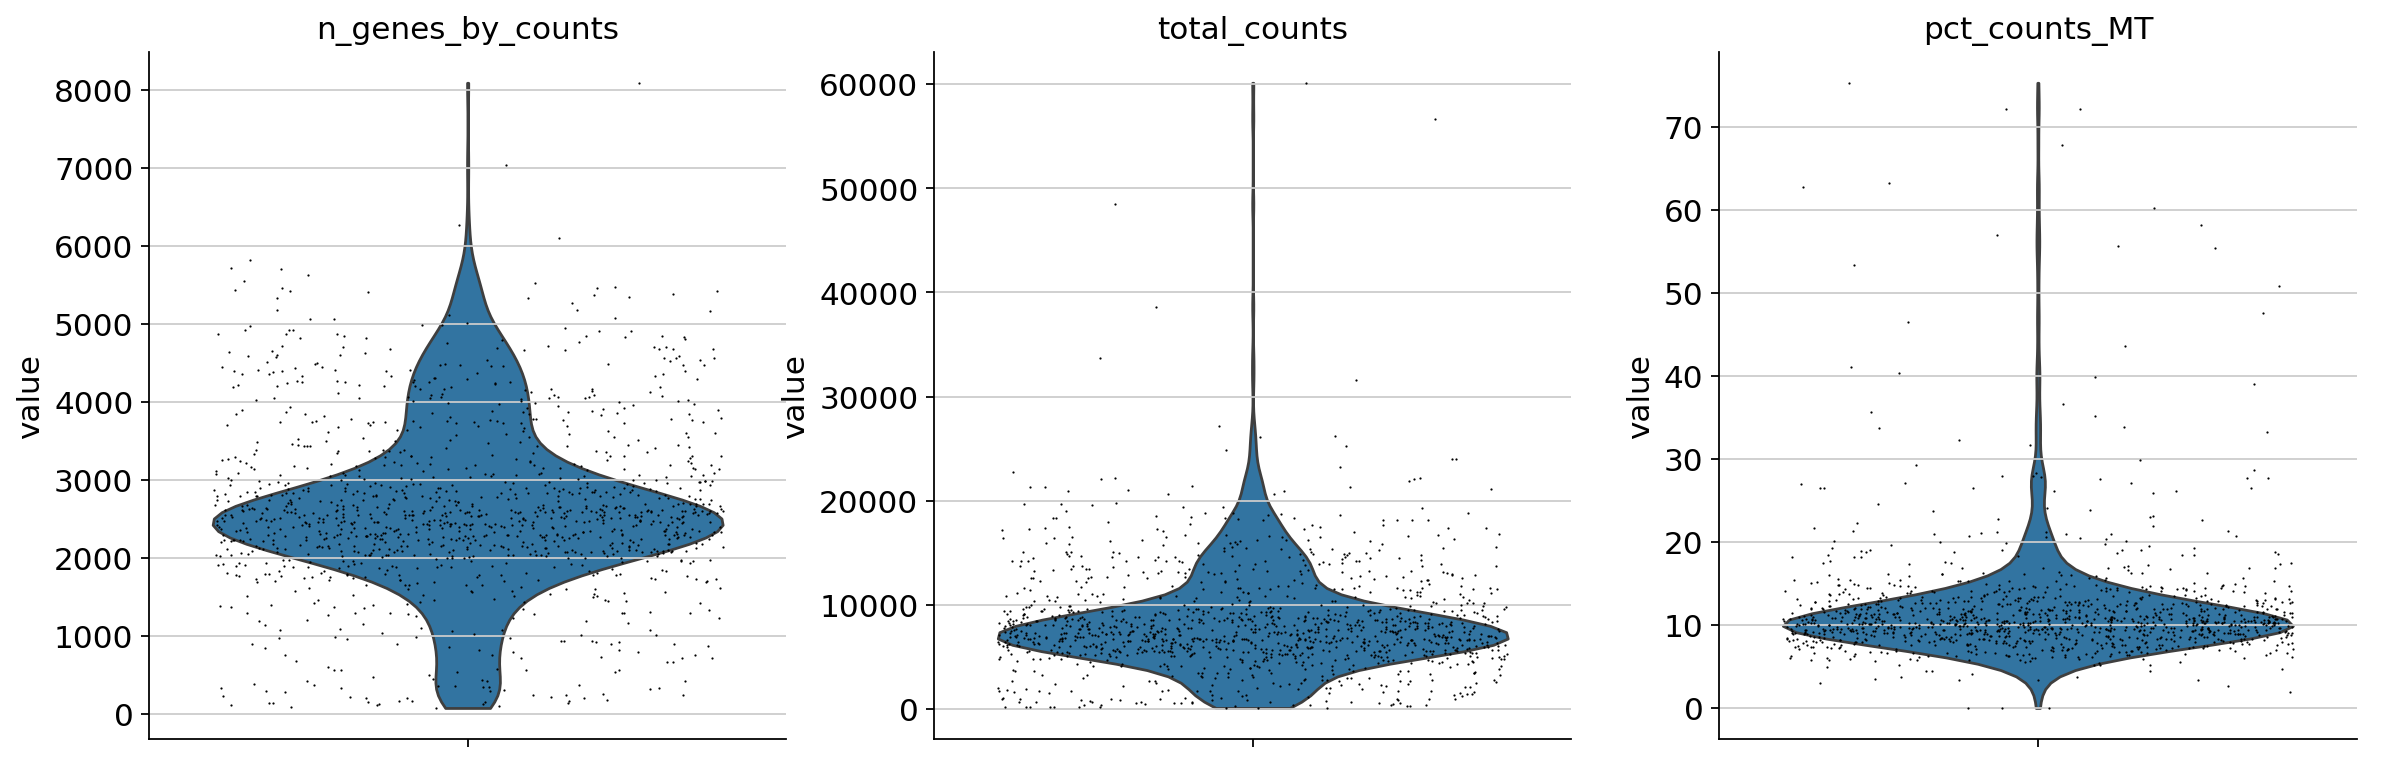

In [23]:
#plot violine plots
sc.pl.violin(adata_QC, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT'], jitter=0.4, multi_panel=True)

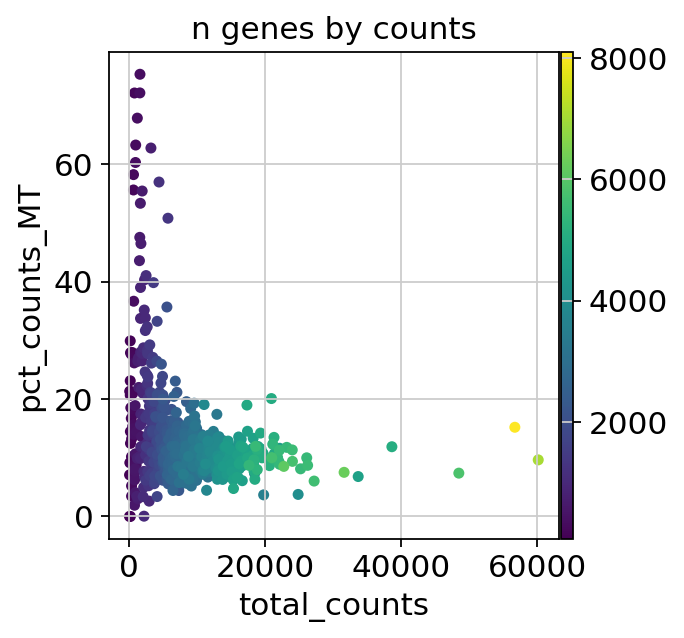

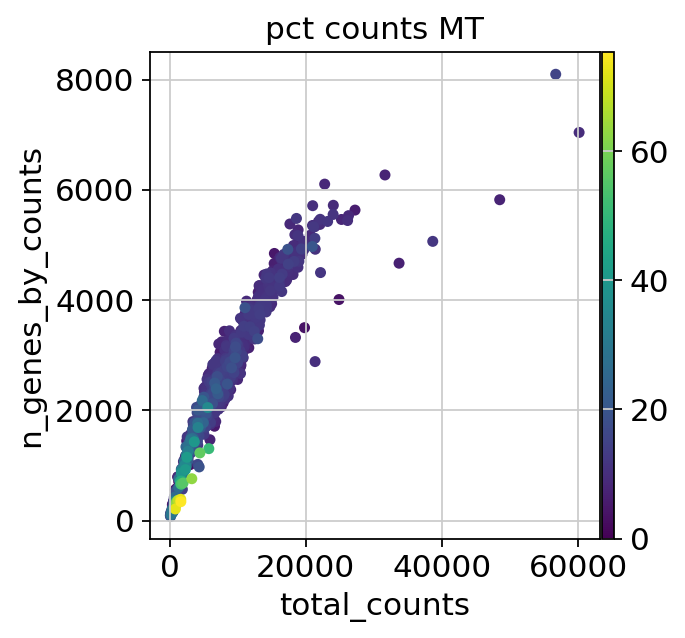

In [24]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_MT', color='n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='pct_counts_MT')

# Filter cells based on QC thresholds
These thresholds remove:
#### - low-complexity cells (low UMIs / low genes)
#### - potential doublets (extremely high UMIs)
#### - stressed or dying cells (high mitochondrial content)

In [25]:
#what i used in seurat object nCount_RNA > 1000 &
    #nCount_RNA < 20000 &
    #nFeature_RNA > 1000 &
    #percent_mito < 20
adata_QC_filtered = adata_QC.copy()

adata_QC_filtered= adata_QC_filtered[
    (adata_QC_filtered.obs.total_counts > 1000) &
    (adata_QC_filtered.obs.total_counts < 20000) &
    (adata_QC_filtered.obs.n_genes_by_counts > 1000) &
    (adata_QC_filtered.obs.pct_counts_MT < 20)]


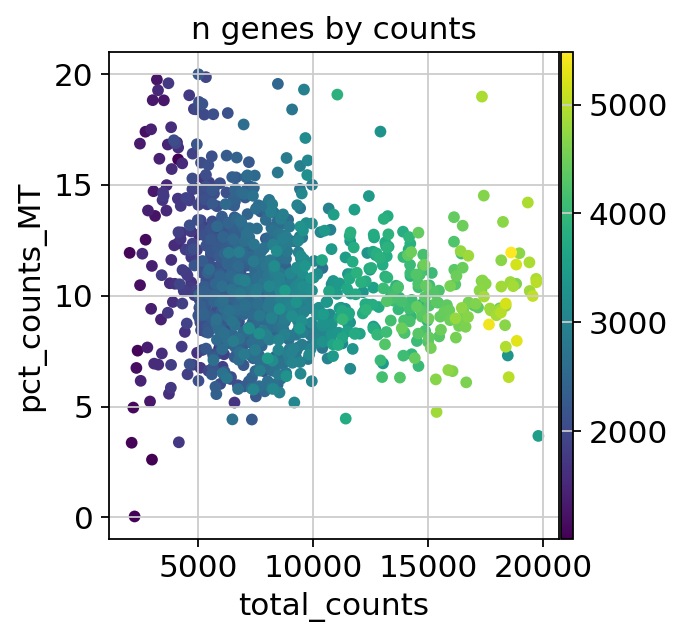

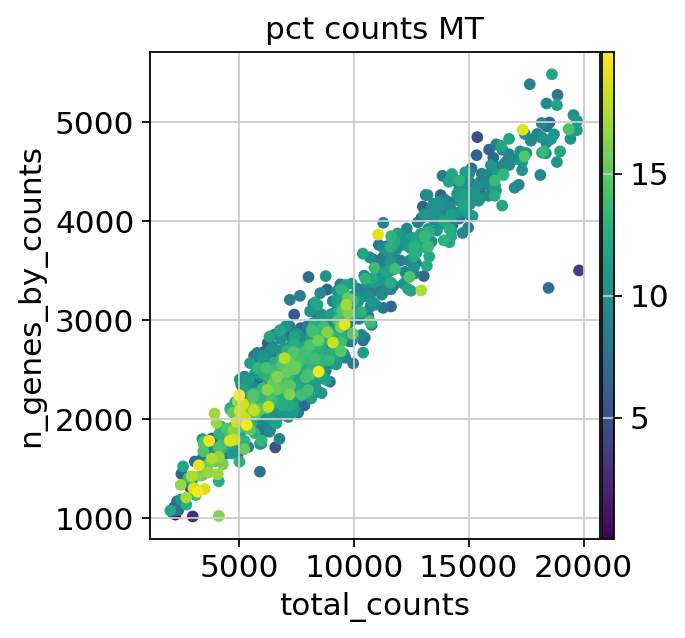

In [26]:
sc.pl.scatter(adata_QC_filtered, x='total_counts', y='pct_counts_MT', color='n_genes_by_counts')
sc.pl.scatter(adata_QC_filtered, x='total_counts', y='n_genes_by_counts', color='pct_counts_MT')

# normalization and log transformation
norm : adjust the sampling effects or technical biases in the data
ie capture efficiency, sequencing depth, technical cofounders
normalize the counts in the data matrix X to 10, 000 reads per cell

In [27]:
norm_data = adata_QC_filtered.copy()
sc.pp.normalize_total(norm_data, target_sum=1e4)
norm_data

AnnData object with n_obs × n_vars = 1072 × 60623
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT'

In [28]:
# log transformation to reduce skweness and make data symetrical

In [29]:
#log n+1 transformation
sc.pp.log1p(norm_data)
norm_data

#1072 × 60623

AnnData object with n_obs × n_vars = 1072 × 60623
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT'
    uns: 'log1p'

# Find highly variable genes
HVG: genes that exhibit high cell to cell variations in expression levels
they influence phenotype and play roles in diseases and biological processes
DEG: genes that significanly change in expression between different treatments or conditions

In [30]:

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [31]:
print(norm_data)
print("####################################################")
print(HVG_data)

AnnData object with n_obs × n_vars = 1072 × 60623
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT'
    uns: 'log1p'
####################################################
AnnData object with n_obs × n_vars = 1072 × 60623
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [32]:
HVG_data.var['highly_variable']

DDX11L1        False
WASH7P         False
MIR6859-1      False
MIR1302-2HG    False
MIR1302-2      False
               ...  
AC240274.1     False
U1-14          False
U1-15          False
AC213203.2     False
AC213203.1     False
Name: highly_variable, Length: 60623, dtype: bool

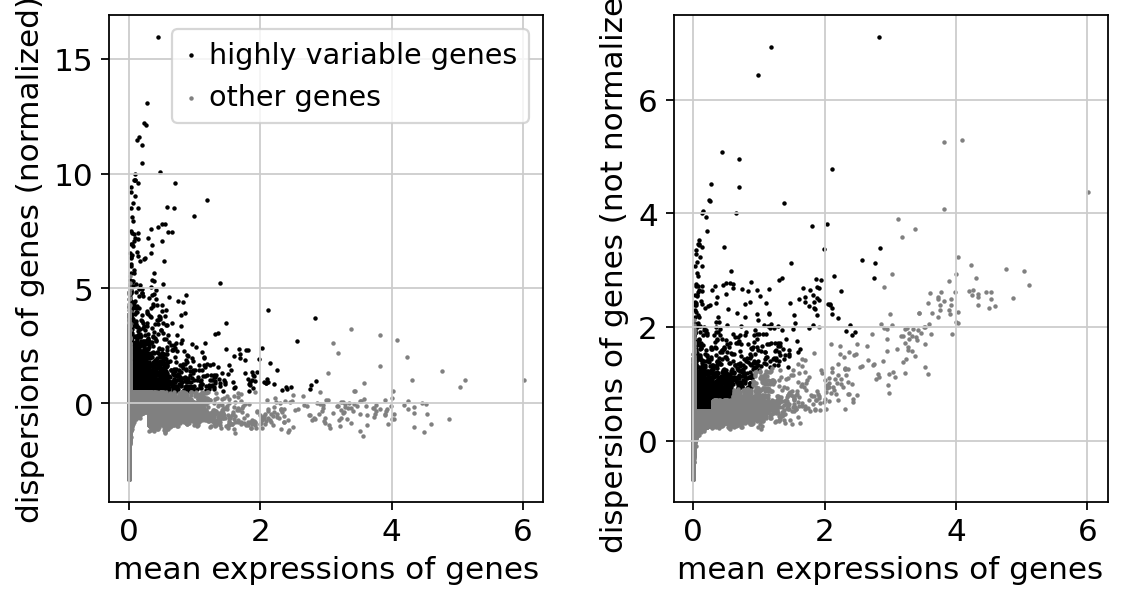

In [33]:
#visualize
sc.pl.highly_variable_genes(HVG_data)

In [34]:
#filter dataset to only work with Highly variable genes
HVG_data = HVG_data[:, HVG_data.var.highly_variable]
HVG_data
#1072 × 4803

View of AnnData object with n_obs × n_vars = 1072 × 4803
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

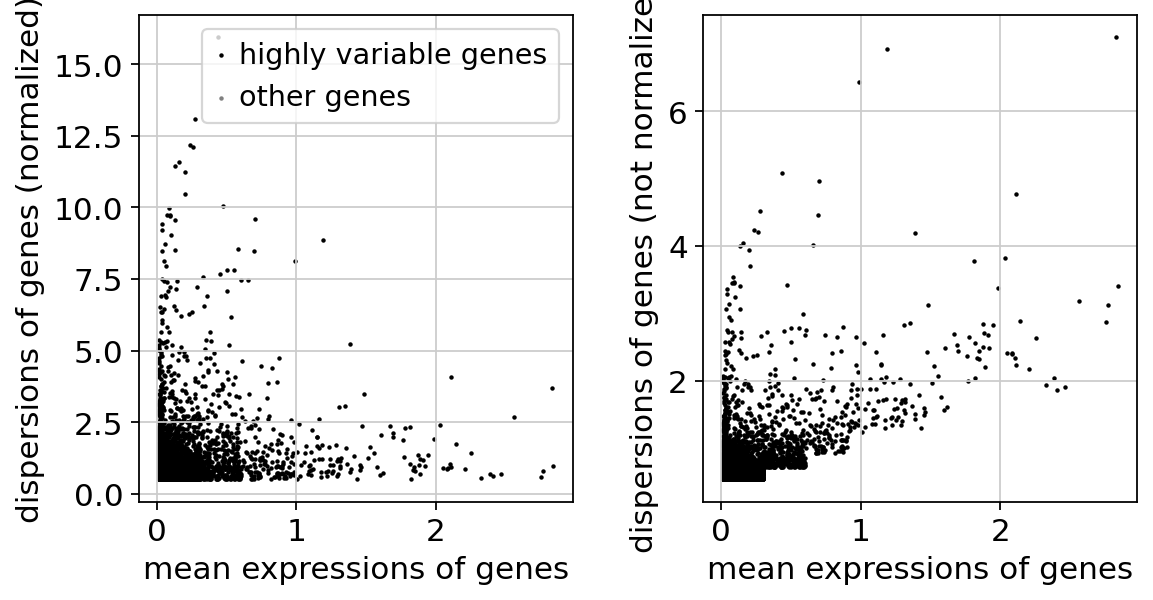

In [35]:
#visualize
sc.pl.highly_variable_genes(HVG_data)

# scaling data 
filter values that have a STD greater than 10 to prevents extreme outliers from dominating PCA

In [36]:
pcHVG_data = HVG_data.copy()
#scale to unit variance for PCA
sc.pp.scale(pcHVG_data, max_value=10)                       

In [37]:
print(HVG_data)
print("#################################################")
print(pcHVG_data)

View of AnnData object with n_obs × n_vars = 1072 × 4803
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
#################################################
AnnData object with n_obs × n_vars = 1072 × 4803
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'


# Dimensionality reduction with PCA
to help decide  the no of clustering analysis downstream

In [38]:
sc.tl.pca(pcHVG_data)
print(pcHVG_data)
#a new df obsm x_pca

AnnData object with n_obs × n_vars = 1072 × 4803
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


### plot elbow graph to show which pcs contribute to the variance and chose the no of pcas

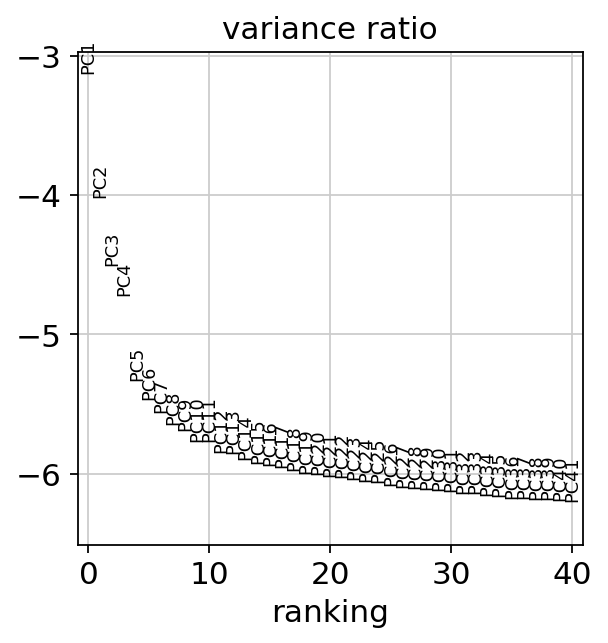

In [39]:
sc.pl.pca_variance_ratio(pcHVG_data, log=True, n_pcs=40)

# Elbow plot helps identify PCs capturing meaningful biological signal
PCs before the "elbow" capture structured biological variation
PCs after the elbow stats to flatten mostly represent noise
Here, we retain the first 20 PCs

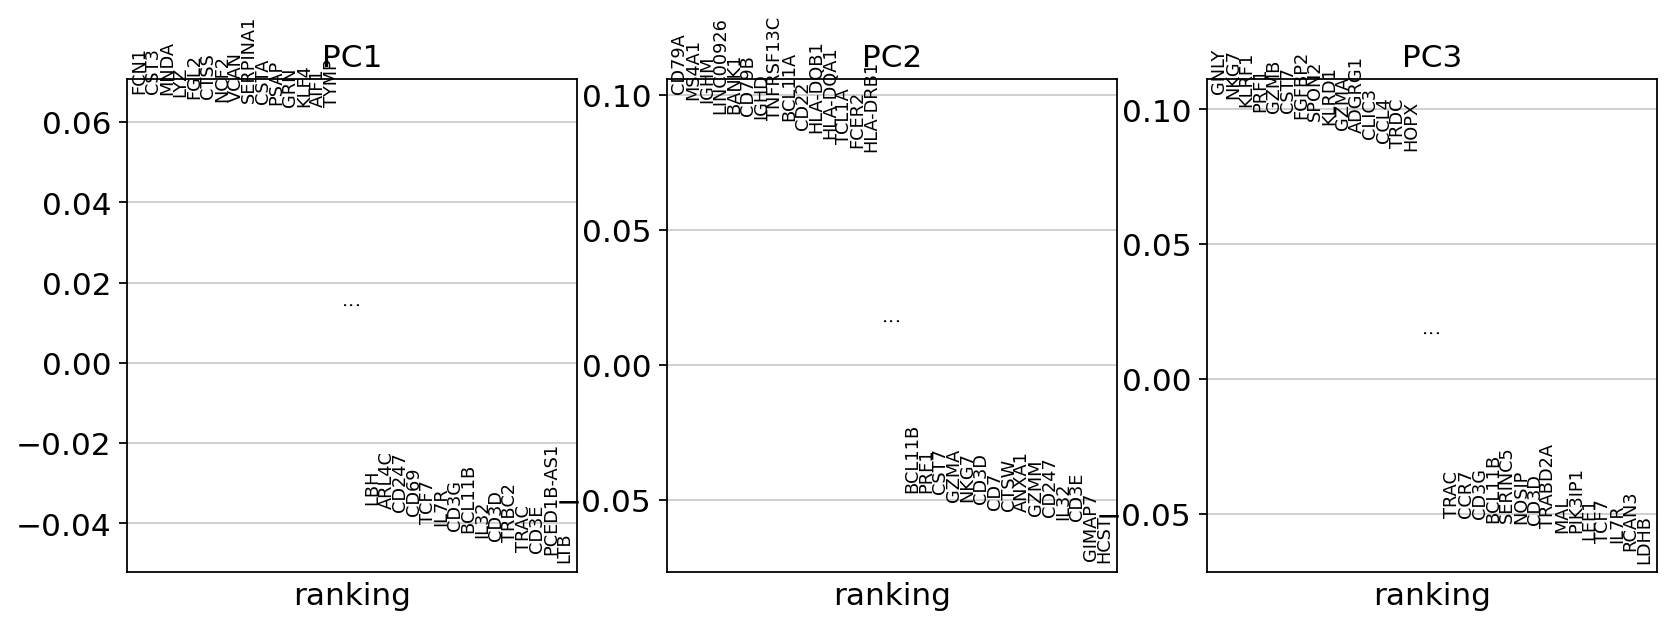

In [40]:
sc.pl.pca_loadings(pcHVG_data)

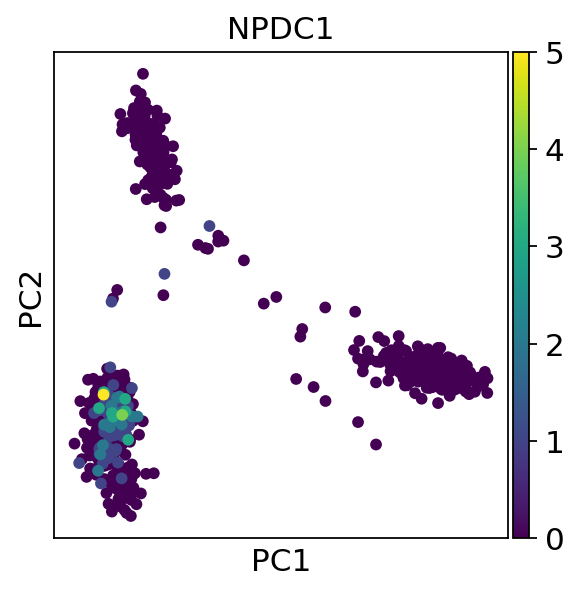

In [41]:
sc.pl.pca(pcHVG_data, color="NPDC1")

# find neighbours  and plot graph

In [42]:

sc.pp.neighbors(pcHVG_data, n_pcs=20)
pcHVG_data

/home/kinya/miniconda3/envs/sc_PBMC/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AnnData object with n_obs × n_vars = 1072 × 4803
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [43]:
pcHVG_data.obsp

PairwiseArrays with keys: distances, connectivities

# embending the neighbours using umap
cells have similar patterns of despite no being the same cell type
umap identifies cells that have similar patterns in gene expressopn and group them together

In [44]:
umHVG_data = pcHVG_data.copy()
sc.tl.umap(umHVG_data)
umHVG_data

AnnData object with n_obs × n_vars = 1072 × 4803
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [45]:
print(umHVG_data.obsm['X_pca'])

[[ 24.781677    -2.461233    -1.1748135  ...   2.276752     1.8140266
    1.9055437 ]
 [ -6.6958294   21.322508     4.638306   ...   3.6845505    0.9632105
    3.4742863 ]
 [-10.20237     -8.000829     7.168169   ...  -7.8056655    1.6819121
    2.176137  ]
 ...
 [-10.325124    -2.259151    -5.618644   ...  -1.4845756   -2.6037617
   -1.0102043 ]
 [ 21.344501    -1.0095447    1.210023   ...  -0.91496295  -0.24926881
    0.81078994]
 [ -9.046647    20.947498     3.3970256  ...   3.5851033   11.146932
   -0.80971843]]


In [46]:
print(umHVG_data.obsm['X_umap'])

[[16.970415   -0.44413322]
 [23.958275   -4.8322988 ]
 [-3.9413662   9.248458  ]
 ...
 [ 0.5262329  10.05933   ]
 [19.812601   -1.4613905 ]
 [24.00993    -5.866049  ]]


# visualization

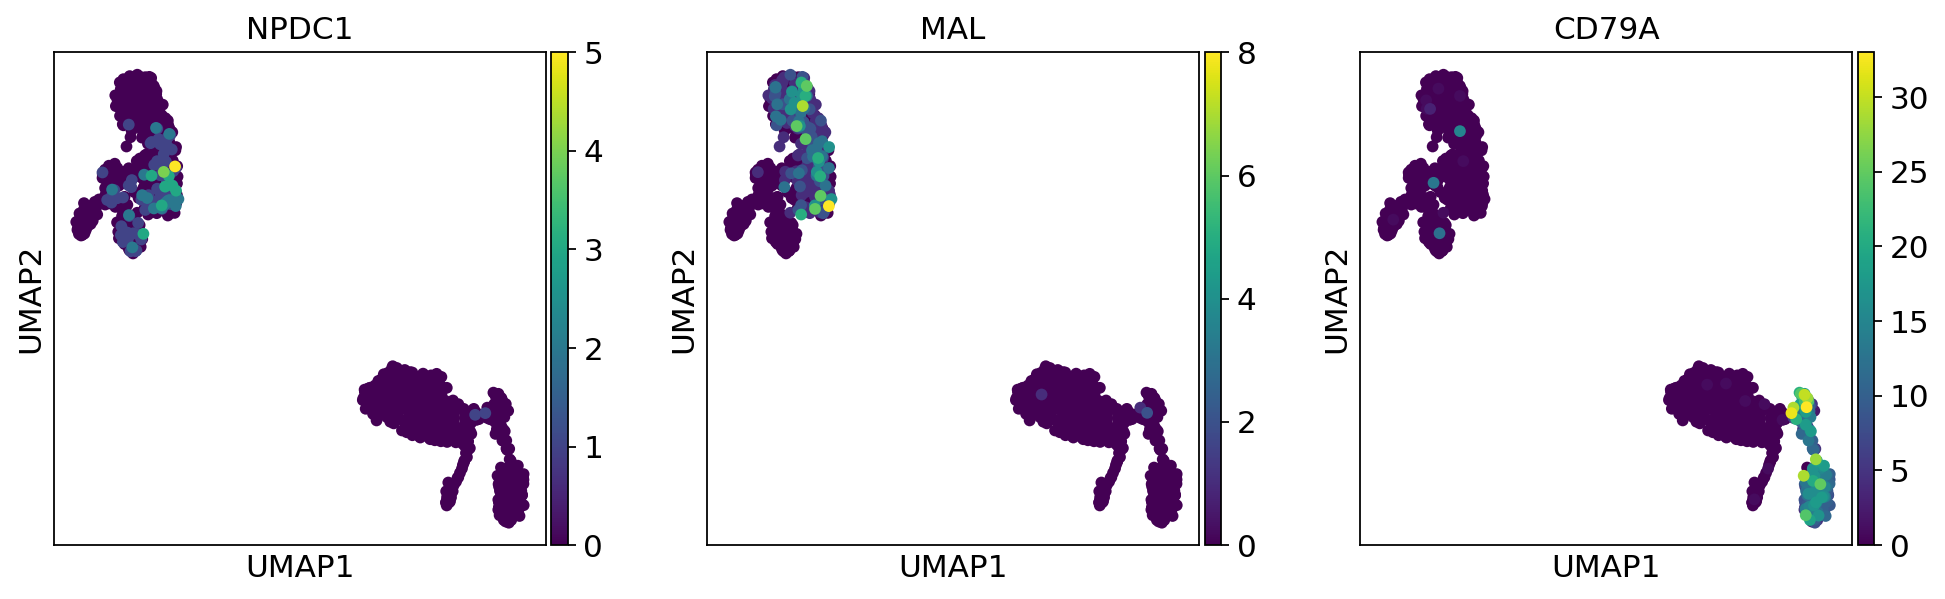

In [47]:
sc.pl.umap(umHVG_data, color=["NPDC1", "MAL","CD79A"])

# find clusters
identify cell types
characterize cell pupulations
understand cell states
identifymarkers and pathways
trajectory inference

In [48]:
!pip install leidenalg

In [49]:
print(umHVG_data)
print("#############################################")
sc.tl.leiden(umHVG_data)
print("#############################################")
print(umHVG_data)

AnnData object with n_obs × n_vars = 1072 × 4803
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
#############################################
#############################################
AnnData object with n_obs × n_vars = 1072 × 4803
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'leiden'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivi

# cluster resolution coarsenes of clustering high resoltion ->more clusters
pbmcs have high cellular heterogeneity low reslution is good to ifentify broad cell types such as Tcells, Bcells and monocytes
for subtypes identification use higer resolution

In [50]:
import numpy as np
#clusters for each resolution
cluster_counts = []

#set resolutions
resolutions=np.arange(0.1, 2, 0.1)

for resolution in np.arange(0.1, 2, 0.1):
    sc.tl.leiden(umHVG_data, resolution=resolution)
    n_clusters=len(umHVG_data.obs['leiden'].unique())
    cluster_counts.append(n_clusters)


cluster_counts

[4, 4, 6, 8, 8, 9, 9, 9, 9, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13]

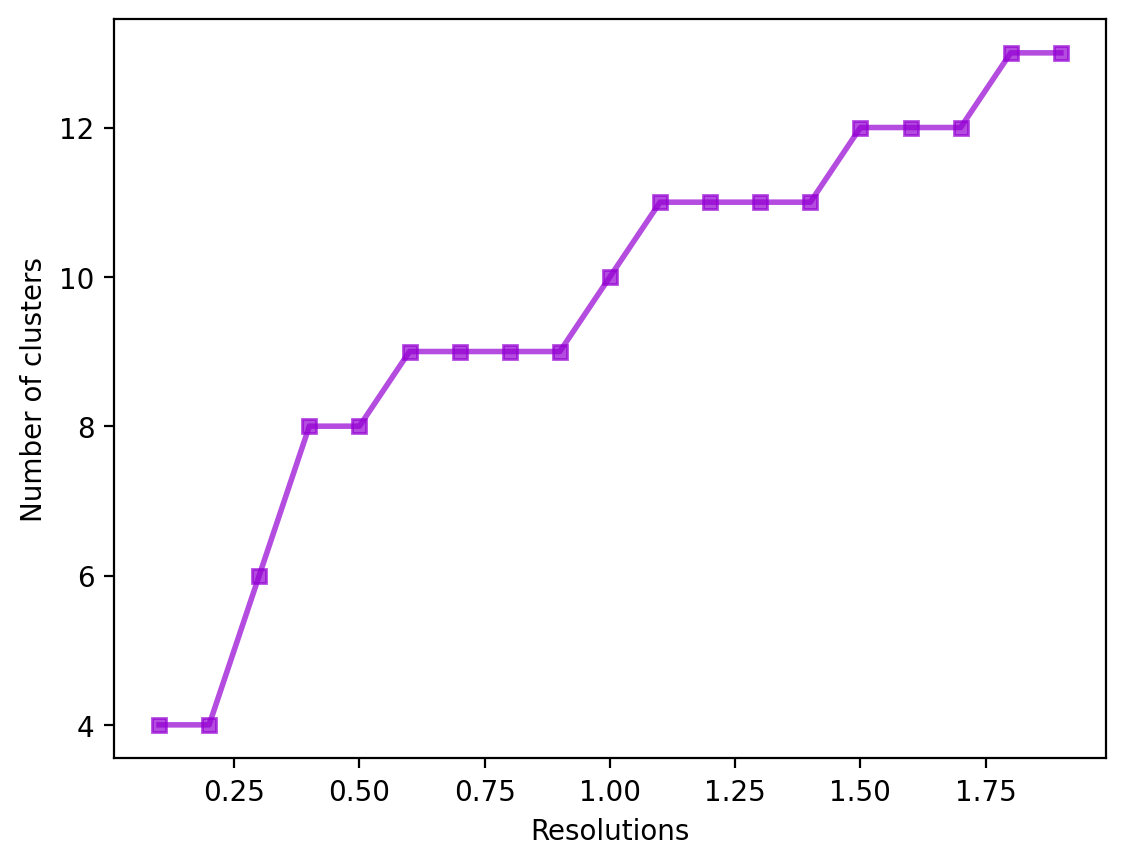

In [51]:
#plot
plt.style.use('default')
plt.plot(resolutions, cluster_counts, marker='s', alpha=0.7, markersize=5, color='darkviolet', linewidth=2)
plt.xlabel('Resolutions')
plt.ylabel('Number of clusters')
plt.show()

In [132]:
sc.tl.leiden(umHVG_data, resolution=0.4, key_added="leiden_0.4")
sc.tl.leiden(umHVG_data, resolution=0.5, key_added="leiden_0.5")
sc.tl.leiden(umHVG_data, resolution=1.4, key_added="leiden_1.4")
sc.tl.leiden(umHVG_data, resolution=1.6, key_added="leiden_1.6")
sc.tl.leiden(umHVG_data, key_added="leiden_1.0")

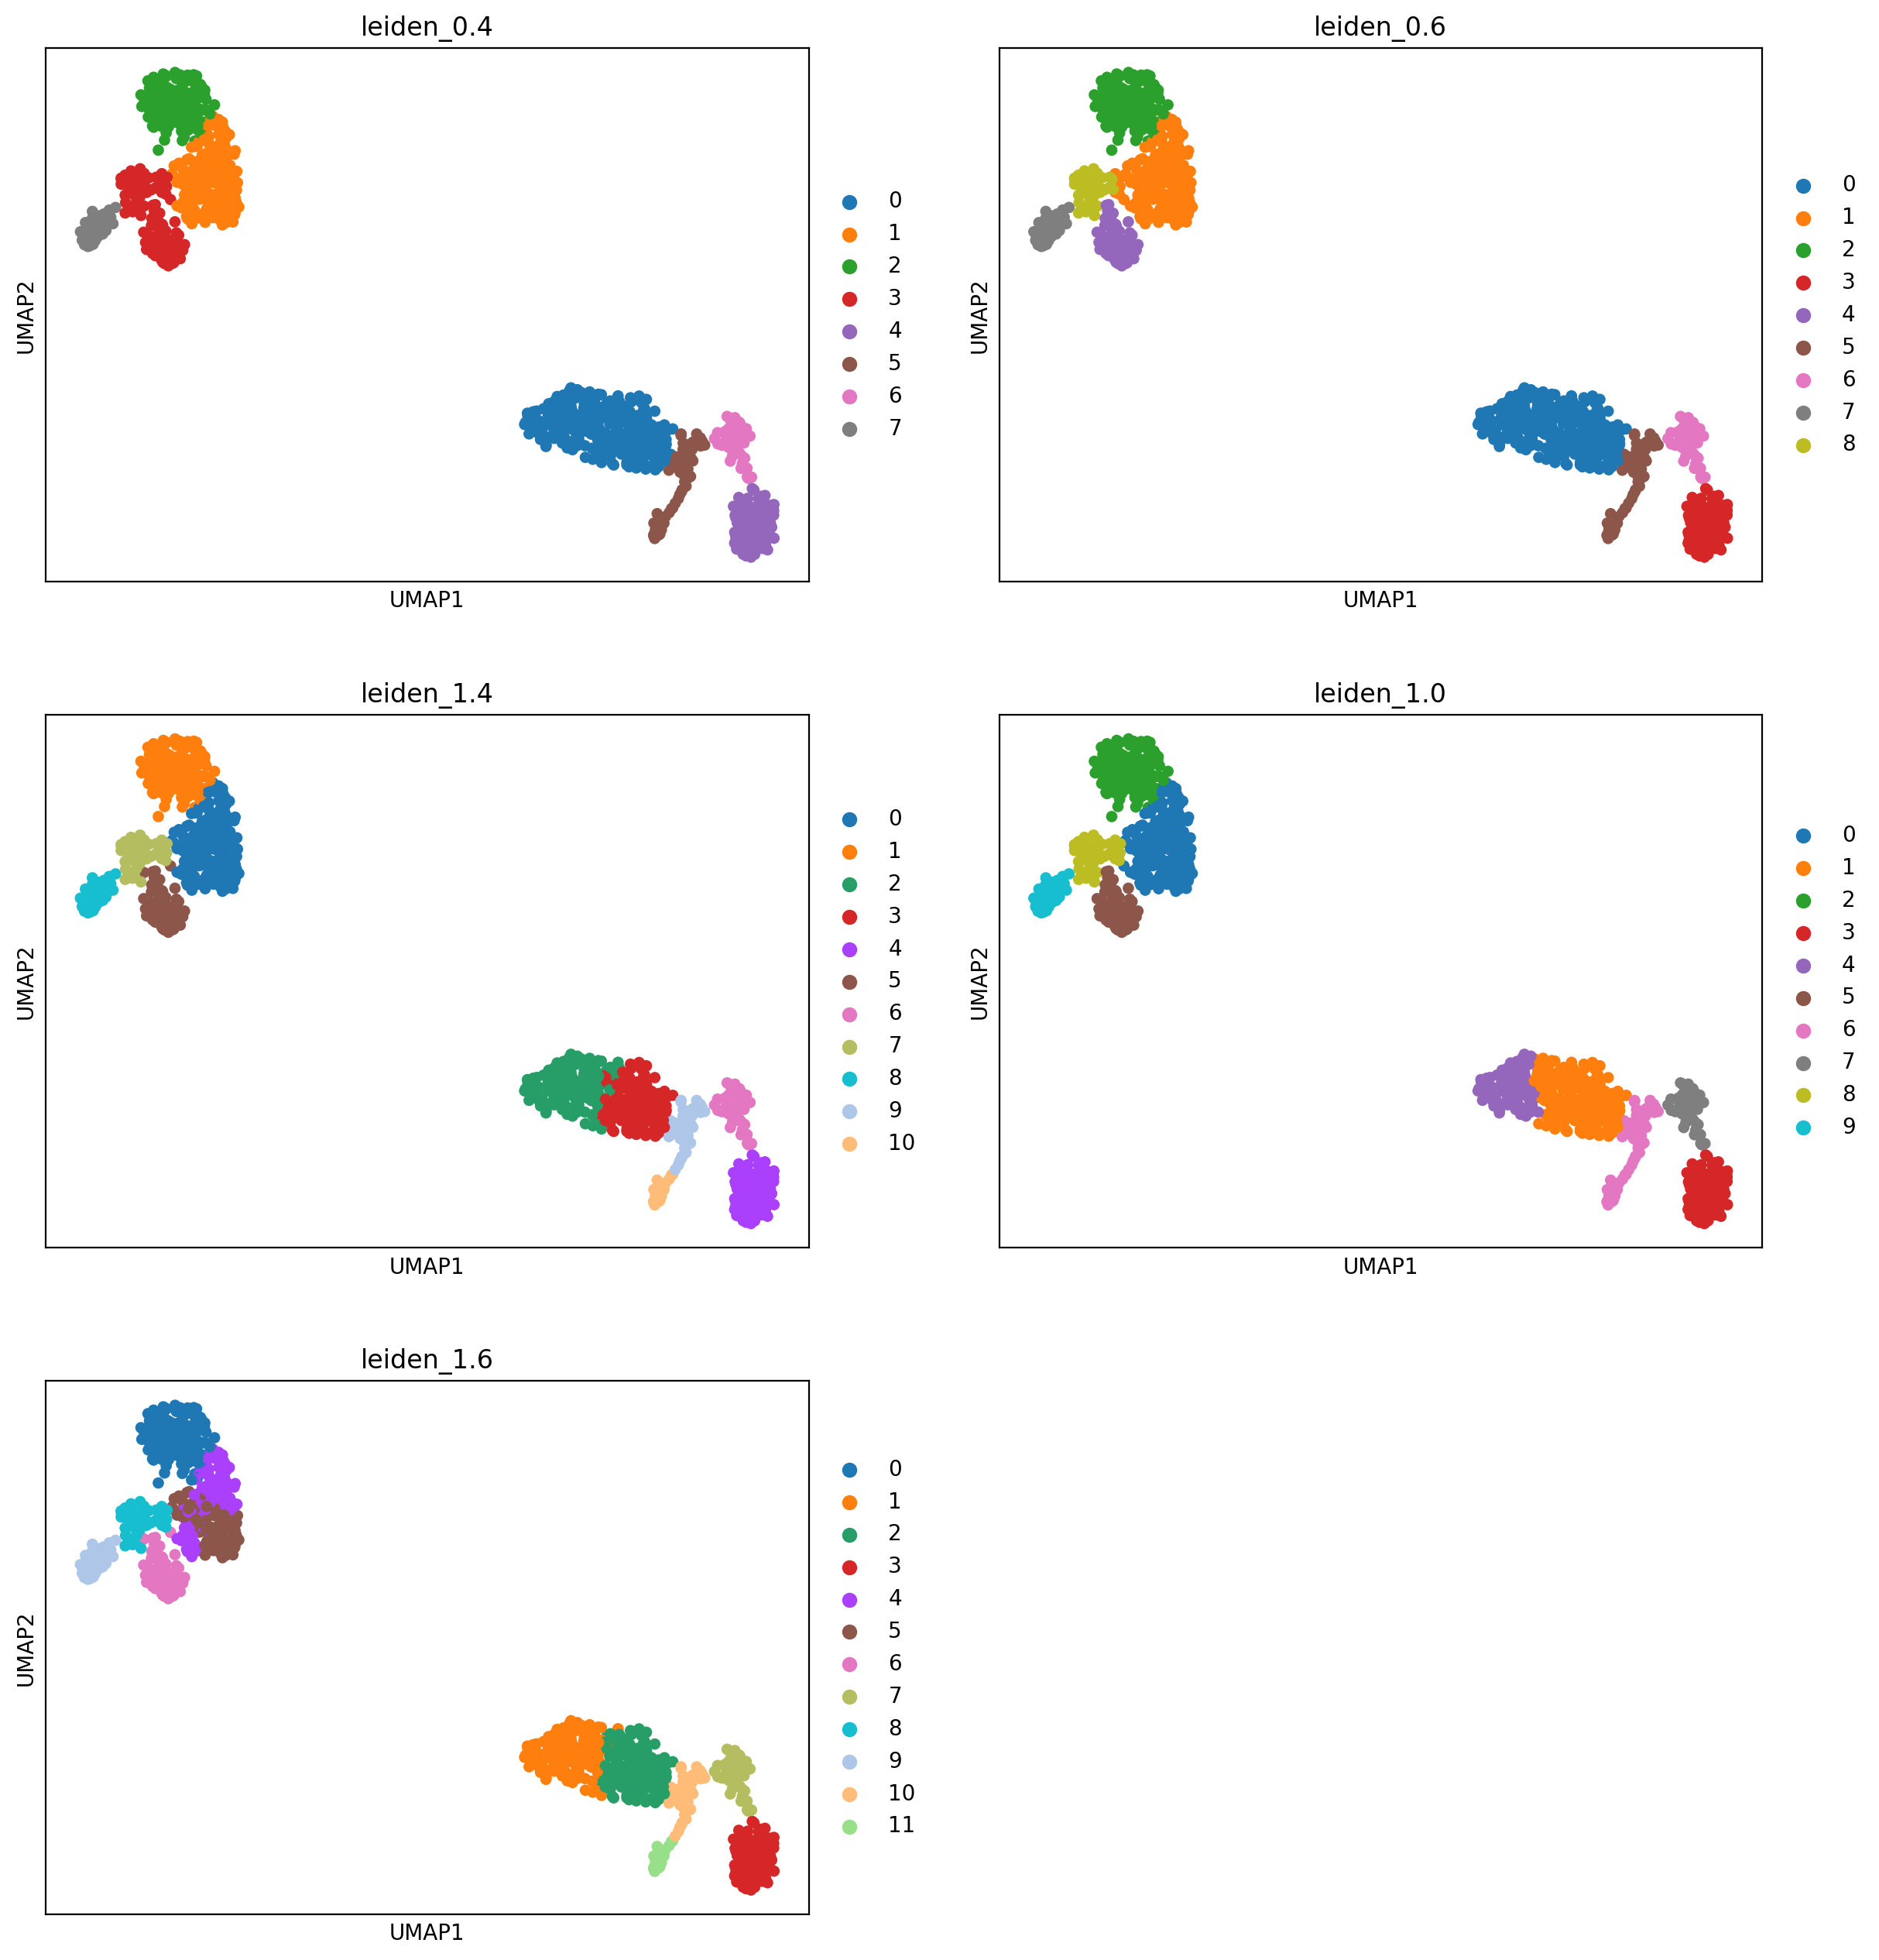

In [133]:
sc.pl.umap(umHVG_data, color=["leiden_0.4", "leiden_0.6", "leiden_1.4","leiden_1.0", "leiden_1.6"], ncols=2)

In [134]:
#no fo cells per cluster
print(umHVG_data.obs["leiden_1.6"].value_counts())

leiden_1.6
0     157
1     143
2     139
3     118
4     106
5      97
6      74
7      59
8      55
9      55
10     48
11     21
Name: count, dtype: int64


# find marker genes
statistical tests t_test/winlcoxon
high score -> higher expression low pvalue ie expression btwn groups are different
low score -> lower expression, higher pvalue

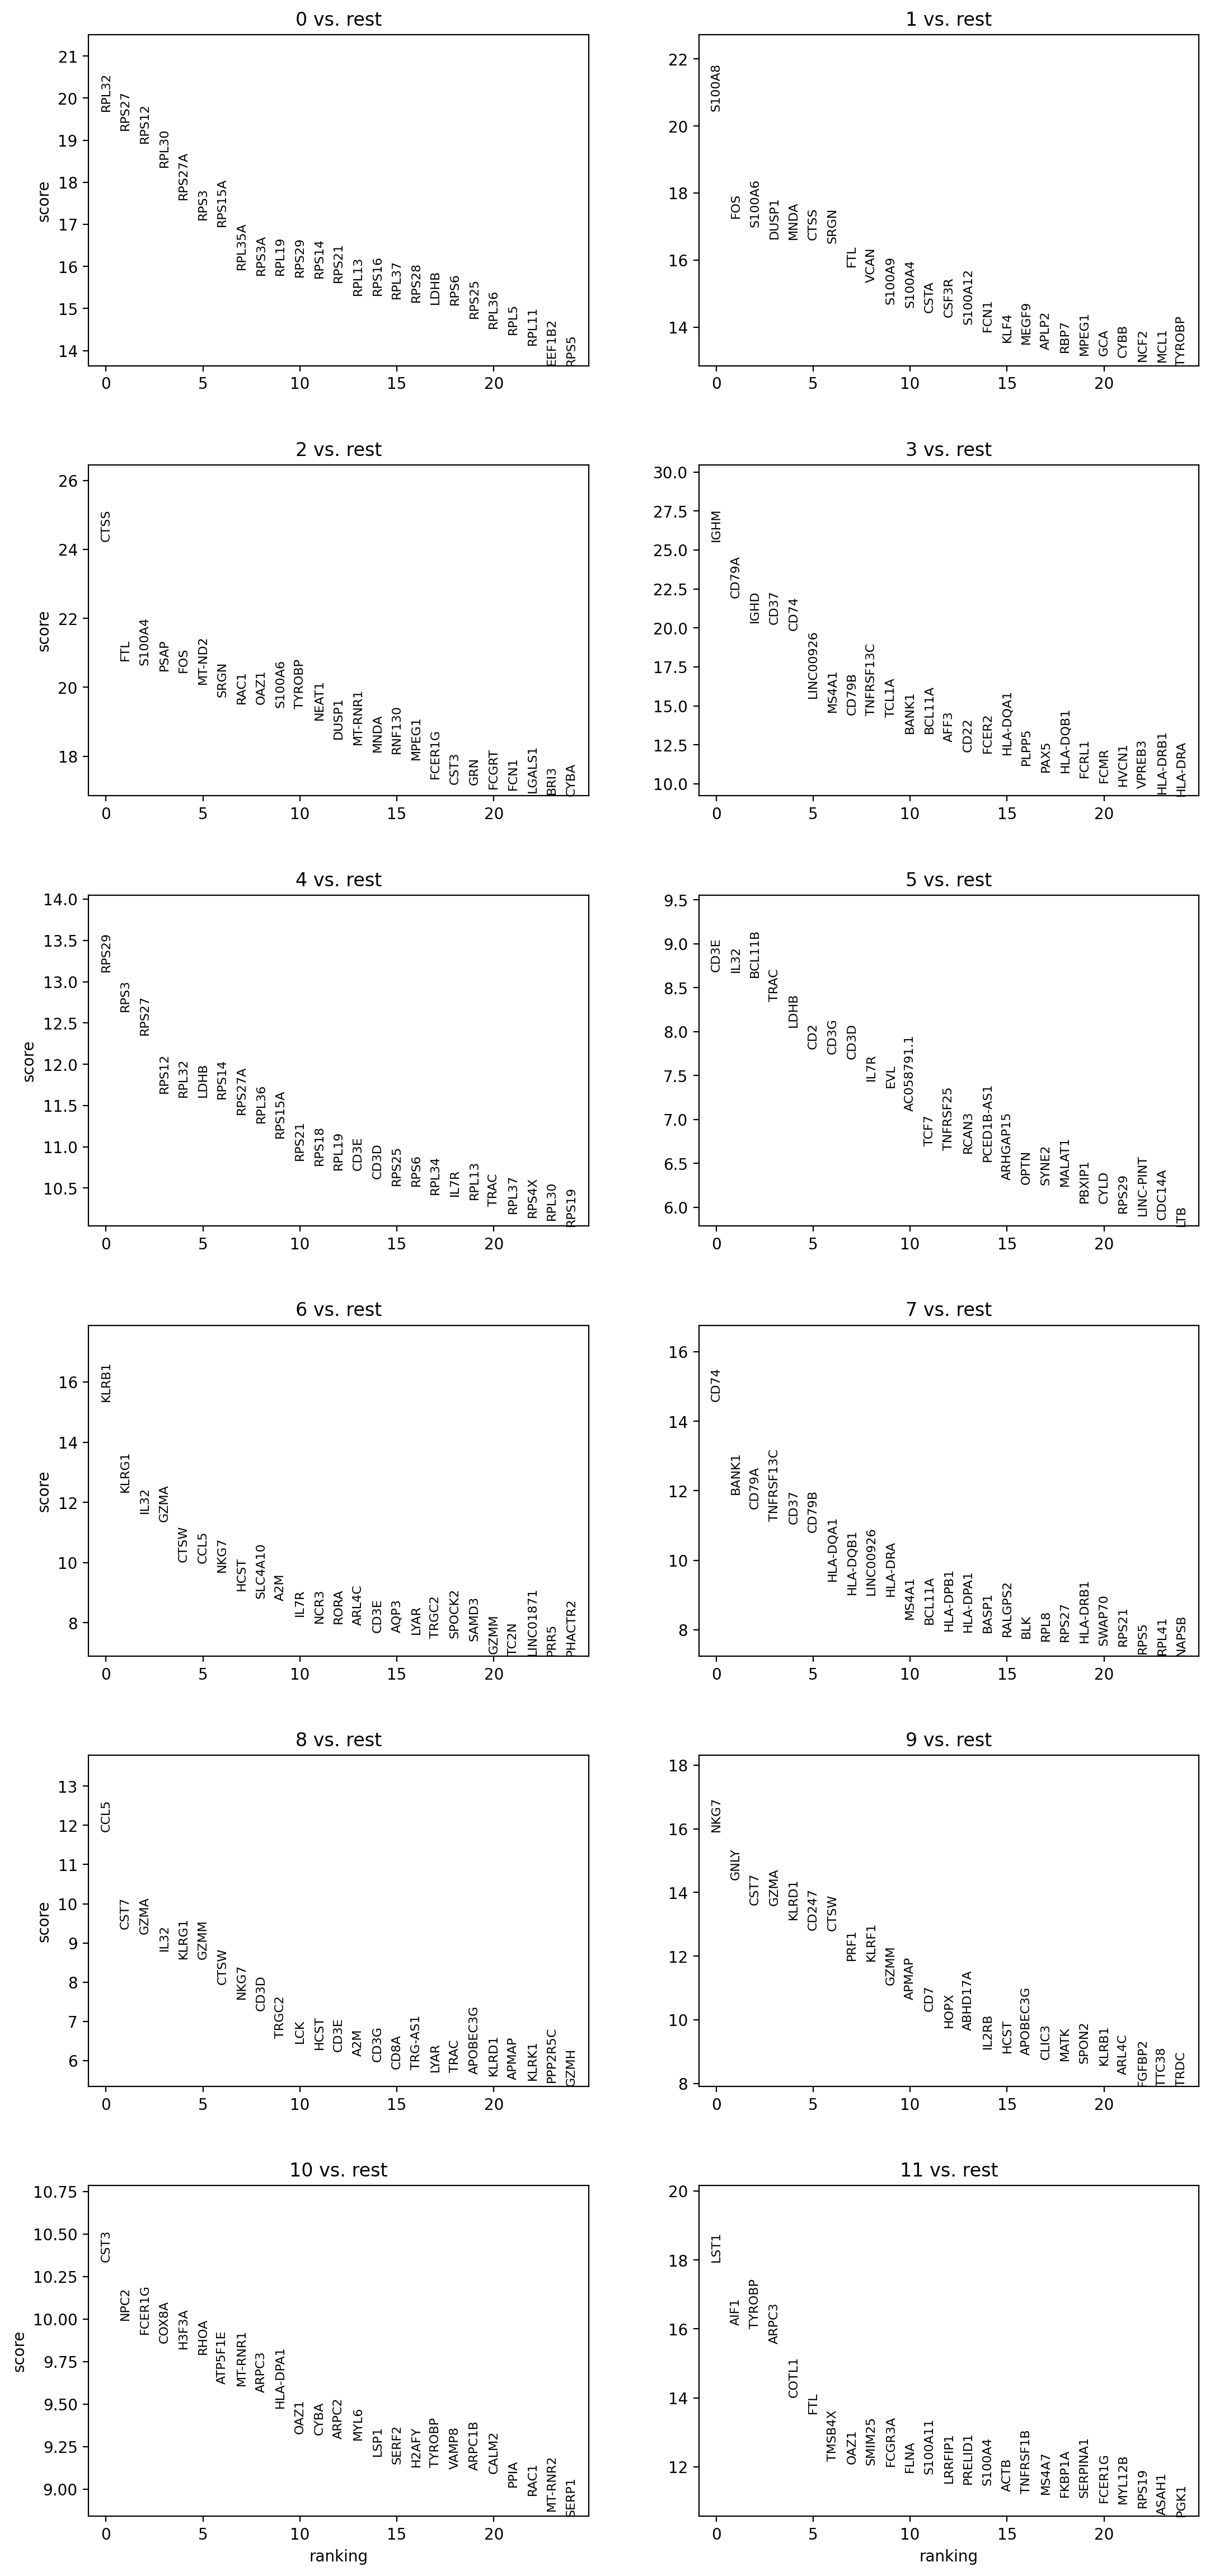

In [135]:
#using ttest Compares each cluster vs all other clusters
sc.tl.rank_genes_groups(umHVG_data, 'leiden_1.6', method='t-test', key_added= "t-test")
sc.pl.rank_genes_groups(umHVG_data, n_genes=25, sharey=False, key ="t-test", ncols=2)

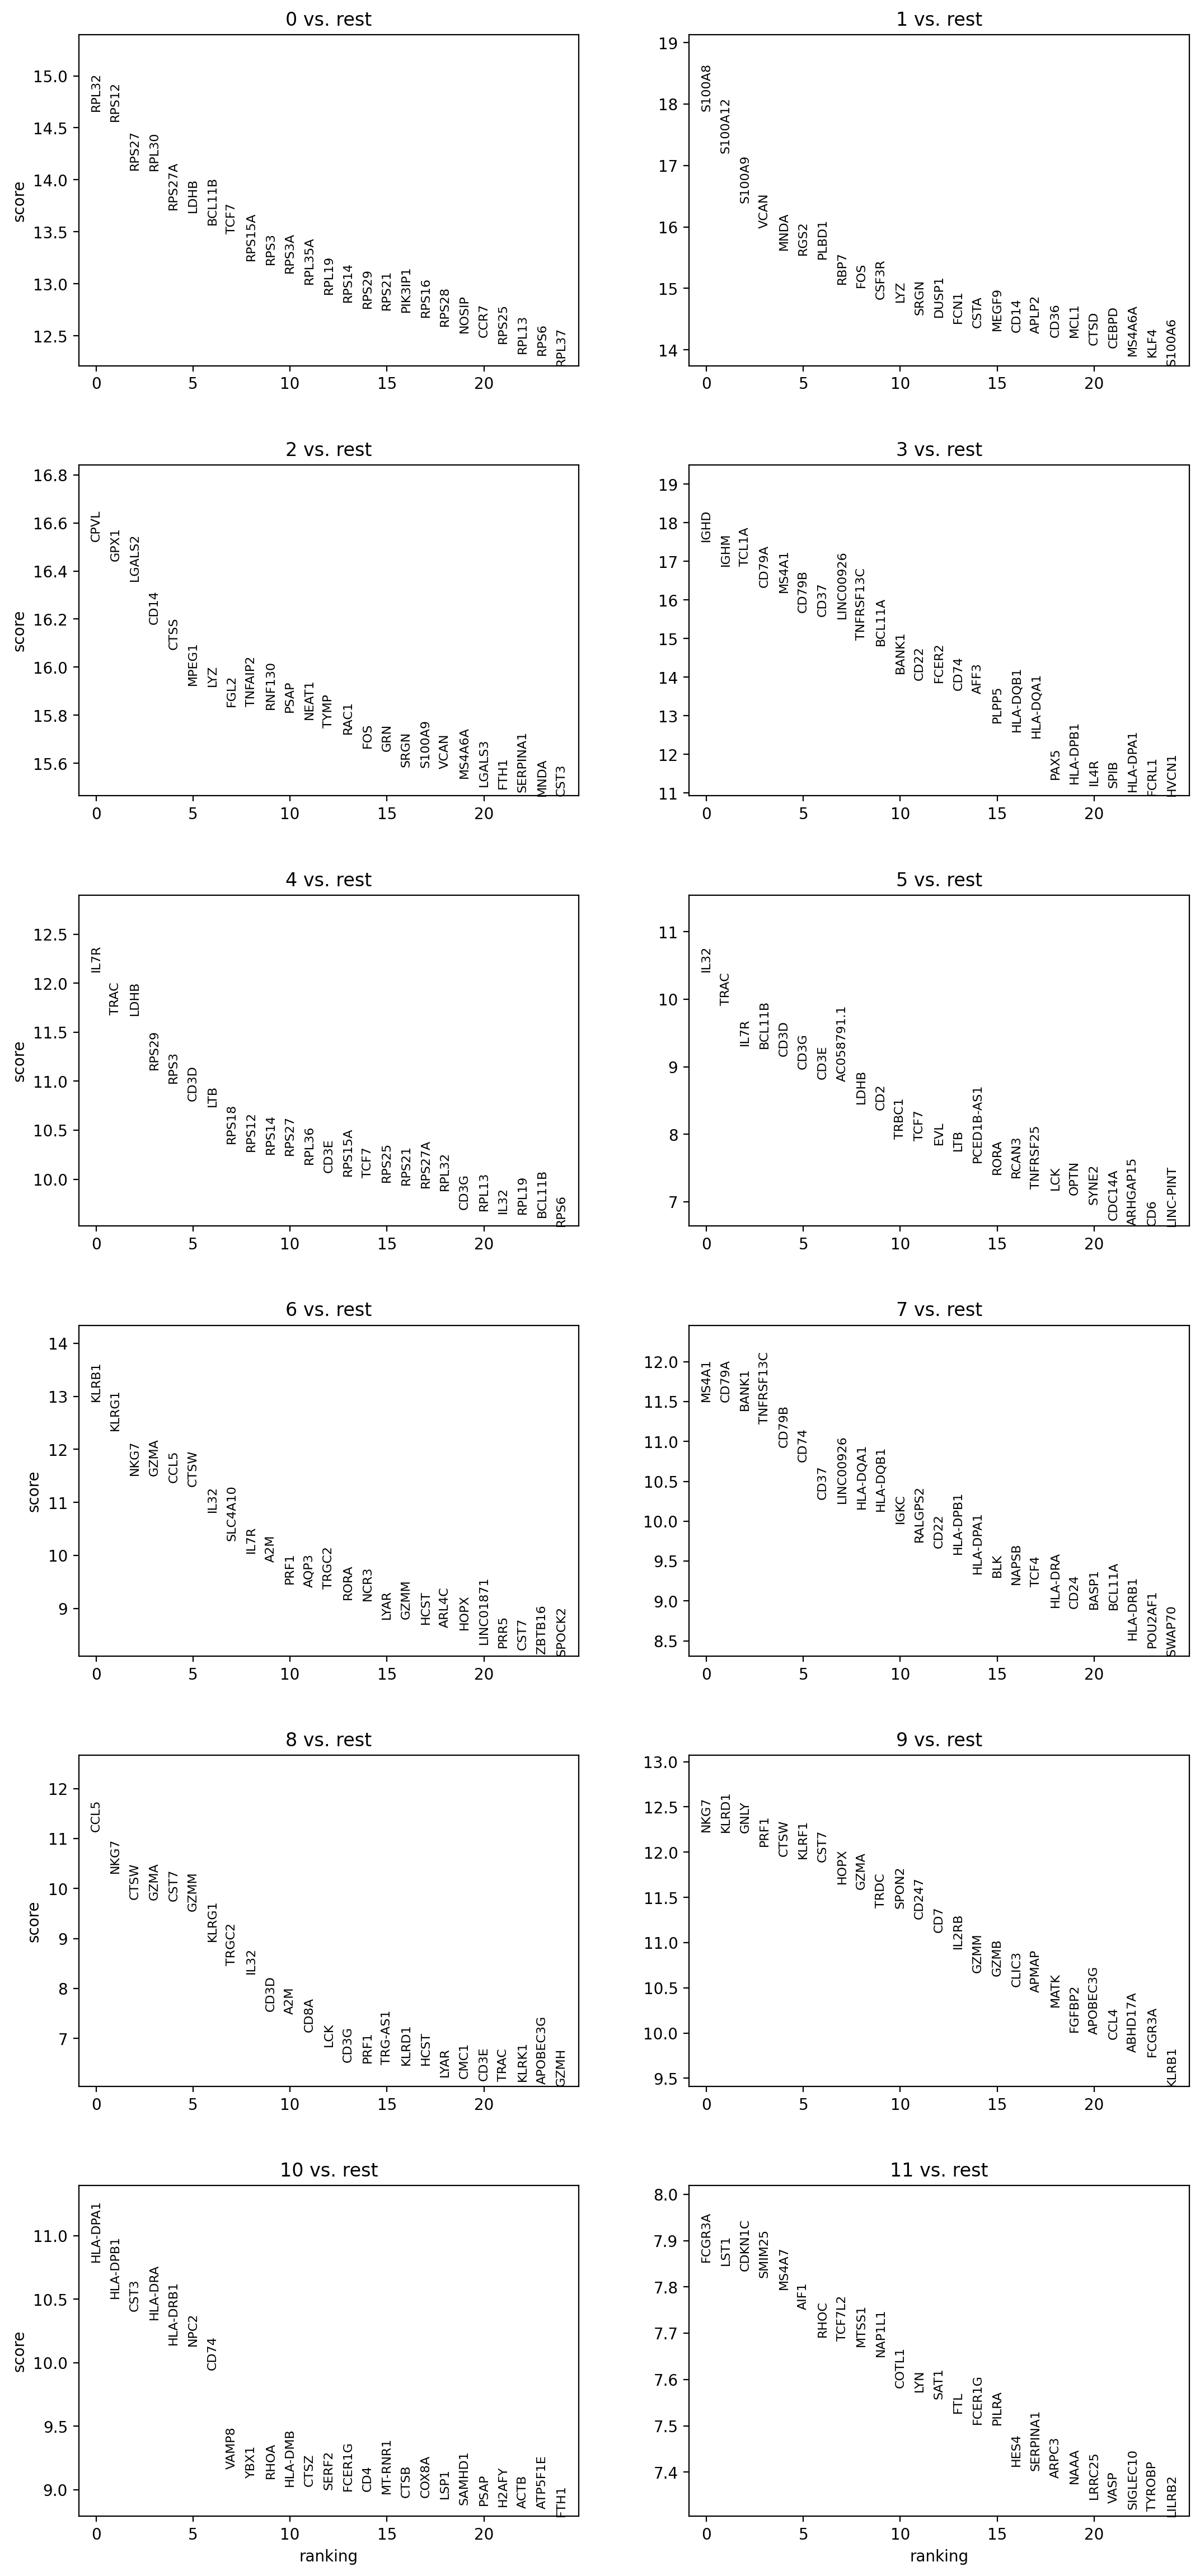

In [136]:
#using wilcoxon Compares each cluster vs all other cells
#not affected by outliers
sc.tl.rank_genes_groups(umHVG_data, 'leiden_1.6', method='wilcoxon', key_added= "wilcoxon")
sc.pl.rank_genes_groups(umHVG_data, n_genes=25, sharey=False, key ="wilcoxon", ncols=2)

In [138]:
print(umHVG_data)
len(umHVG_data.uns['wilcoxon']['names']['0'])

AnnData object with n_obs × n_vars = 1072 × 4803
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'leiden_1.6', 'leiden_1.0', 'celltype', 'leiden_0.5'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'leiden_1.6', 'leiden_1.0', 'leiden_0.6_colors', 'leiden_0.4_colors', 'leiden_1.4_colors', 'leiden_1.0_colors', 'leiden_1.6_colors', 't-test', 'wilcoxon', 'dendrogram_leiden_0.6', 'dendrogram_leiden_1.6', 'leiden_colors', 'celltype_colors', 'leiden_0.5', 'leiden_0.5_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


60623

In [137]:
#top markers per cluster
pd.DataFrame(umHVG_data.uns['wilcoxon']['names']).head(5)

0        1       2      3      4       5      6          7     8  \
0   RPL32   S100A8    CPVL   IGHD   IL7R    IL32  KLRB1      MS4A1  CCL5   
1   RPS12  S100A12    GPX1   IGHM   TRAC    TRAC  KLRG1      CD79A  NKG7   
2   RPS27   S100A9  LGALS2  TCL1A   LDHB    IL7R   NKG7      BANK1  CTSW   
3   RPL30     VCAN    CD14  CD79A  RPS29  BCL11B   GZMA  TNFRSF13C  GZMA   
4  RPS27A     MNDA    CTSS  MS4A1   RPS3    CD3D   CCL5      CD79B  CST7   

       9        10      11  
0   NKG7  HLA-DPA1  FCGR3A  
1  KLRD1  HLA-DPB1    LST1  
2   GNLY      CST3  CDKN1C  
3   PRF1   HLA-DRA  SMIM25  
4   CTSW  HLA-DRB1   MS4A7

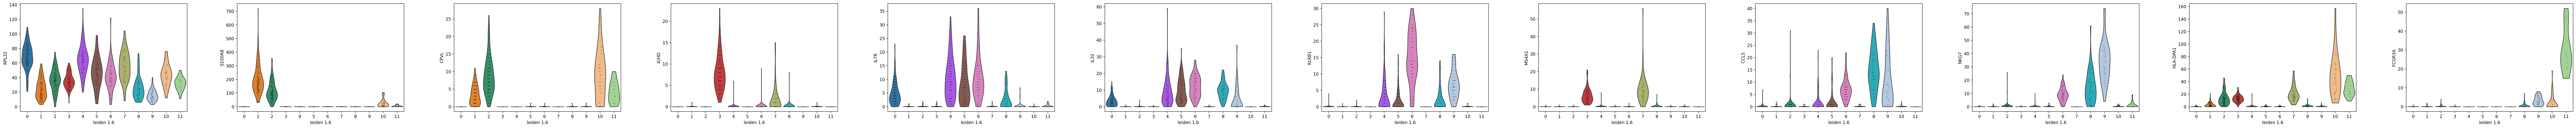

In [81]:
#visualize expressionof the marker genes
sc.pl.violin(umHVG_data, ['VCAN',	'LDHB',	'LDHB',	'IGHD','KLRB1','HLA-DPA1', 'BANK1', 'KLRD1', 'CCL5'], groupby='leiden_1.6')

In [89]:
#save DEG btwn clusters
result = umHVG_data.uns['wilcoxon']
groups = result['names'].dtype.names
df1=pd.DataFrame({group+'' + key:result[key][group] for group in groups for key in ['names','scores','logfoldchanges', 'pvals', 'pvals_adj']})
df1.head()
df1.to_csv('pbmc_1k_DEGs_btwnclusters.csv')

In [90]:
#!pip install matplotlib_venn

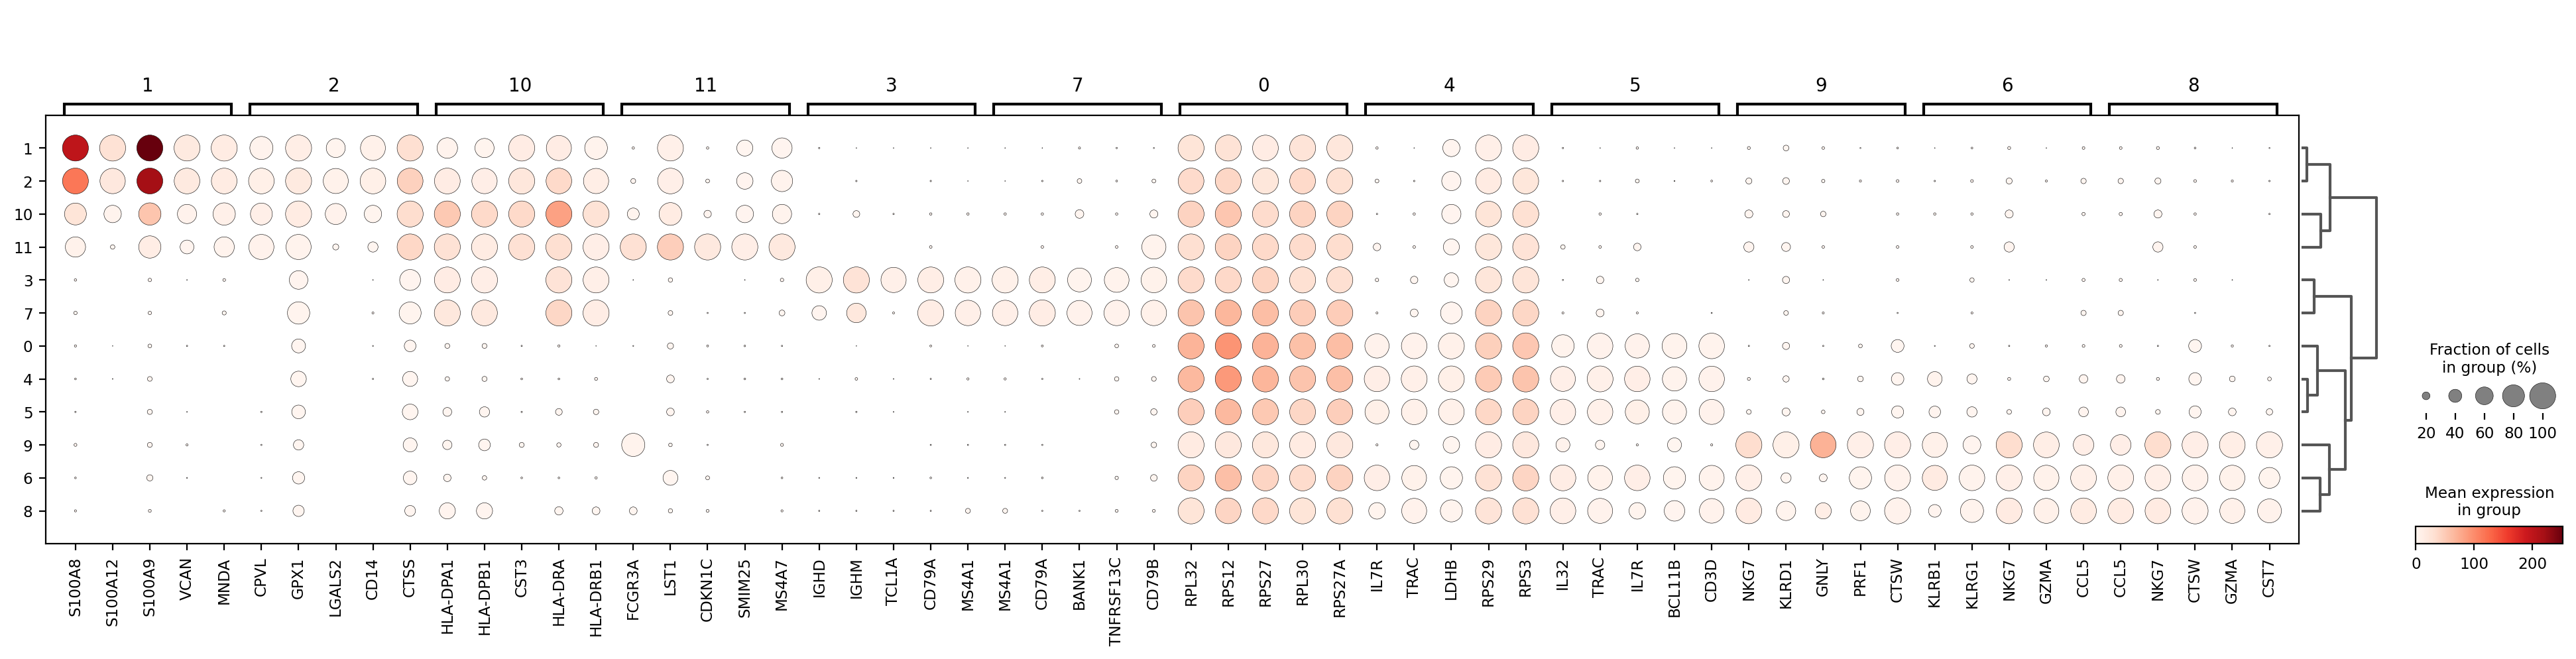

In [76]:
sc.pl.rank_genes_groups_dotplot(umHVG_data, n_genes=5, key="wilcoxon", groupby='leiden_1.6')

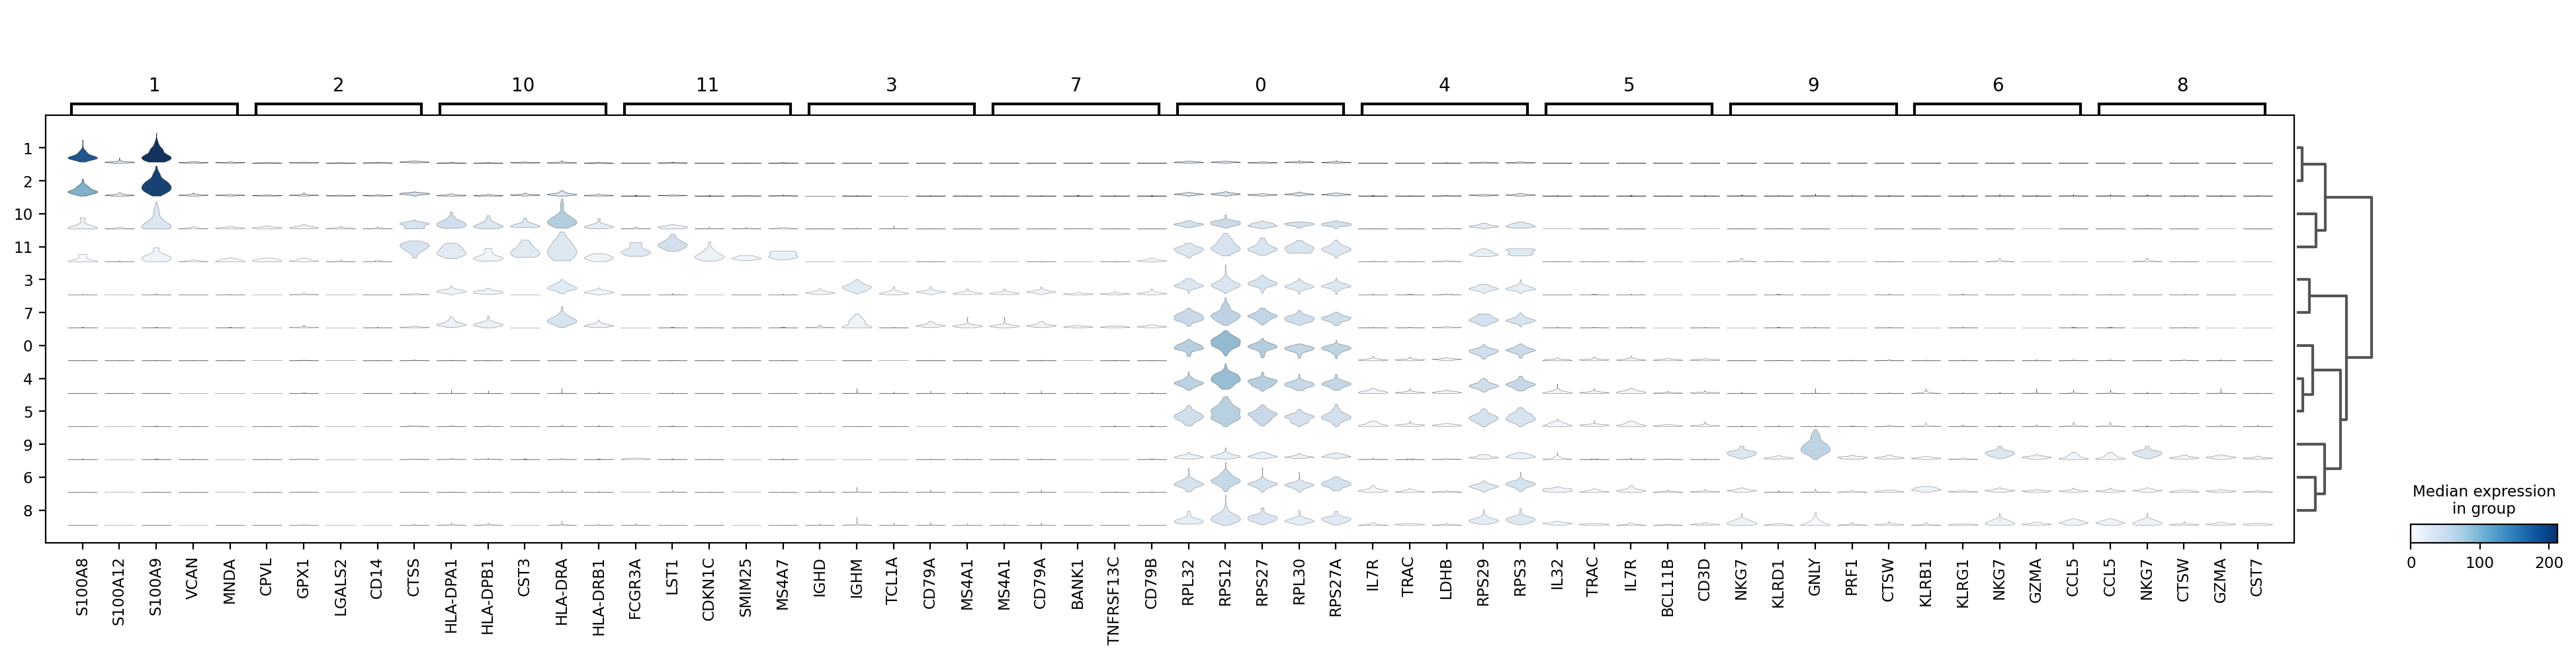

In [77]:
sc.pl.rank_genes_groups_stacked_violin(umHVG_data, n_genes=5, key="wilcoxon", groupby='leiden_1.6')

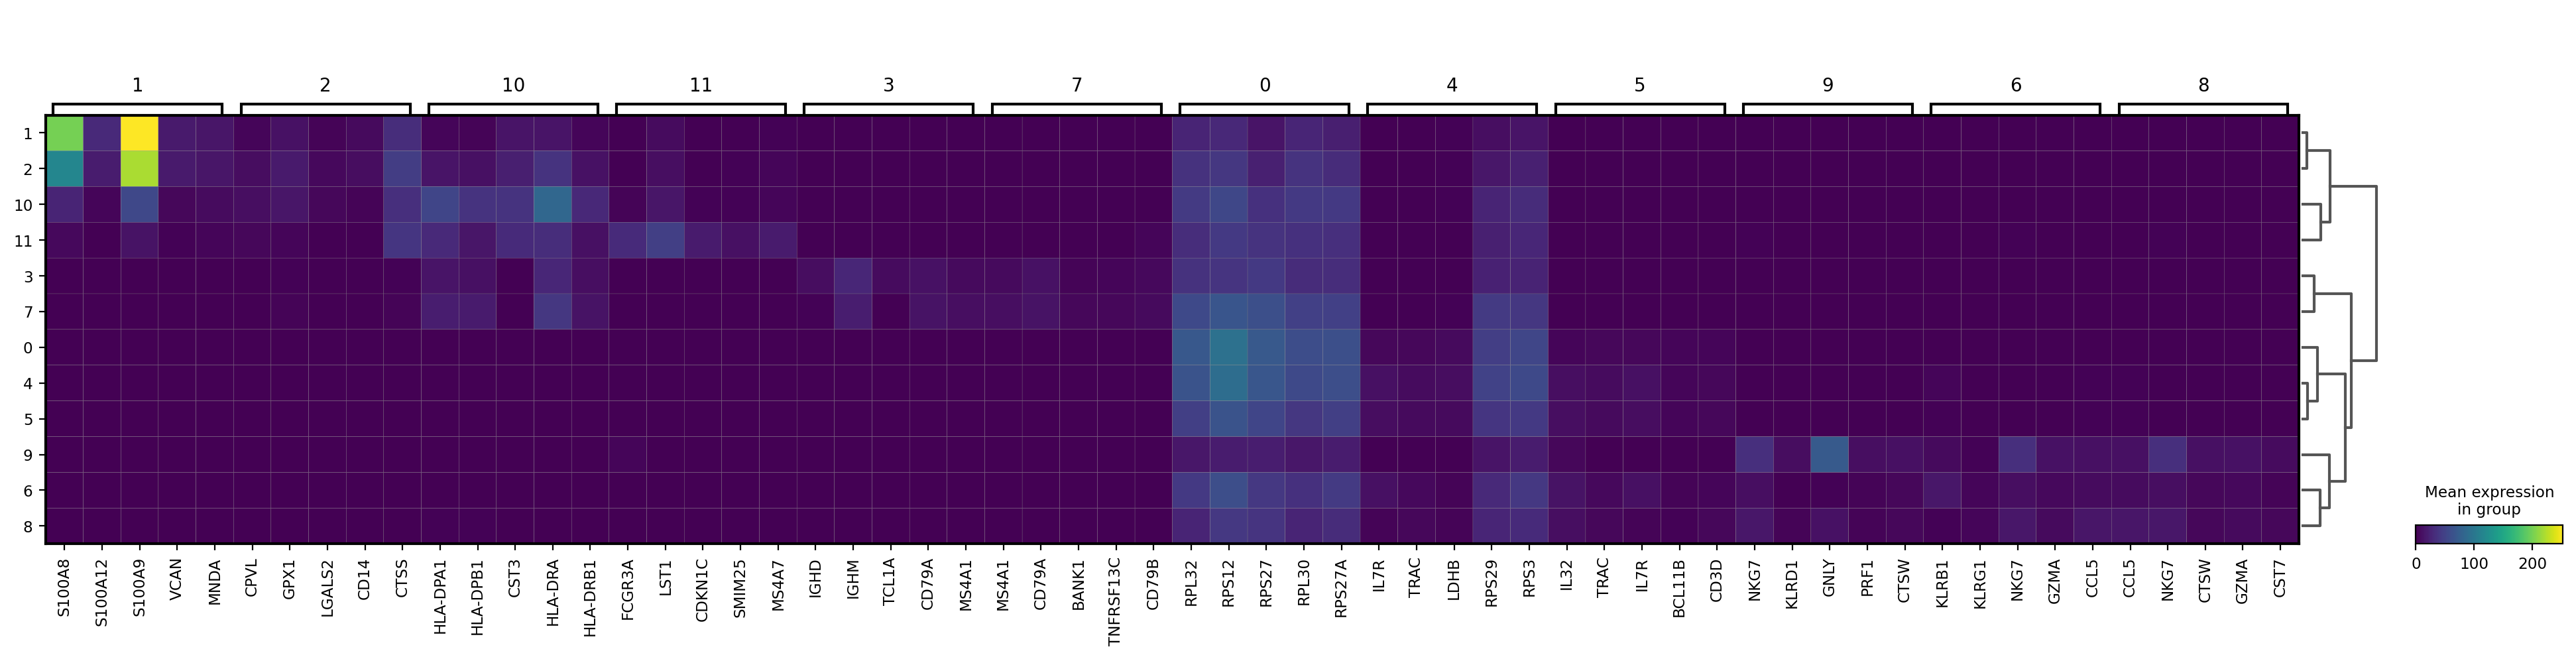

In [78]:
sc.pl.rank_genes_groups_matrixplot(umHVG_data, n_genes=5, key="wilcoxon", groupby='leiden_1.6')

In [64]:
#!pip install celltypist

In [143]:
marker_genes = {
    "CD14+ Monocytes": [
        "S100A8", "S100A9", "S100A12",
        "VCAN", "CTSS", "MNDA", "LGALS2"
    ],

    "FCGR3A+ Monocytes": [
        "FCGR3A", "MS4A7", "LST1", "CST3"
    ],

    "CD4 T cells": [
        "IL7R", "LDHB", "TRAC", "CCR7"
    ],

    "CD8 T cells": [
        "CD3D", "CD3E", "CCL5", "CTSW", "NKG7"
    ],

    "NK cells": [
        "NKG7", "GNLY", "KLRD1", "PRF1", "CTSW"
    ],

    "B cells": [
        "MS4A1", "CD79A", "CD79B", "BANK1", "HLA-DRA"
    ],

    "Naive B cells": [
        "IGHM", "IGHD", "TCL1A", "MS4A1"
    ],

    "Dendritic cells": [
        "HLA-DPA1", "HLA-DPB1", "HLA-DRA", "CST3"
    ],

    "Ribosomal / Low quality": [
        "RPL32", "RPS12", "RPS27", "RPL30"
    ]
}


In [ ]:
https://github.com/DOREENKDAVID/Single-Cell-RNA-seq-Analysis-of-1K-PBMCs-Data-.git

In [95]:
# Check the current cluster categories
umHVG_data.obs['leiden_1.6'].cat.categories


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object')

In [109]:
new_cluster_names = [
    "Ribosomal",   # 0
    "CD14+ Monocytes",           # 1
    "Monocytes",           # 2
    "Naive B",                   # 3
    "CD4 T",                     # 4
    "T cells",                   # 5
    "NK Cytotoxic T",          # 6
    "B cells",                   # 7
    "CD8 T",                # 8
    "NK cells",                  # 9
    "Dendritic cells",           # 10
    "FCGR3A+ Monocytes"          # 11
]
umHVG_data.rename_categories("leiden_1.6", new_cluster_names)

In [123]:
umHVG_data.obs['leiden_1.6'].cat.categories


Index(['Ribosomal', 'CD14+ Monocytes', 'Monocytes', 'Naive B', 'CD4 T',
       'T cells', 'NK Cytotoxic T', 'B cells', 'CD8 T', 'NK cells',
       'Dendritic cells', 'FCGR3A+ Monocytes'],
      dtype='object')

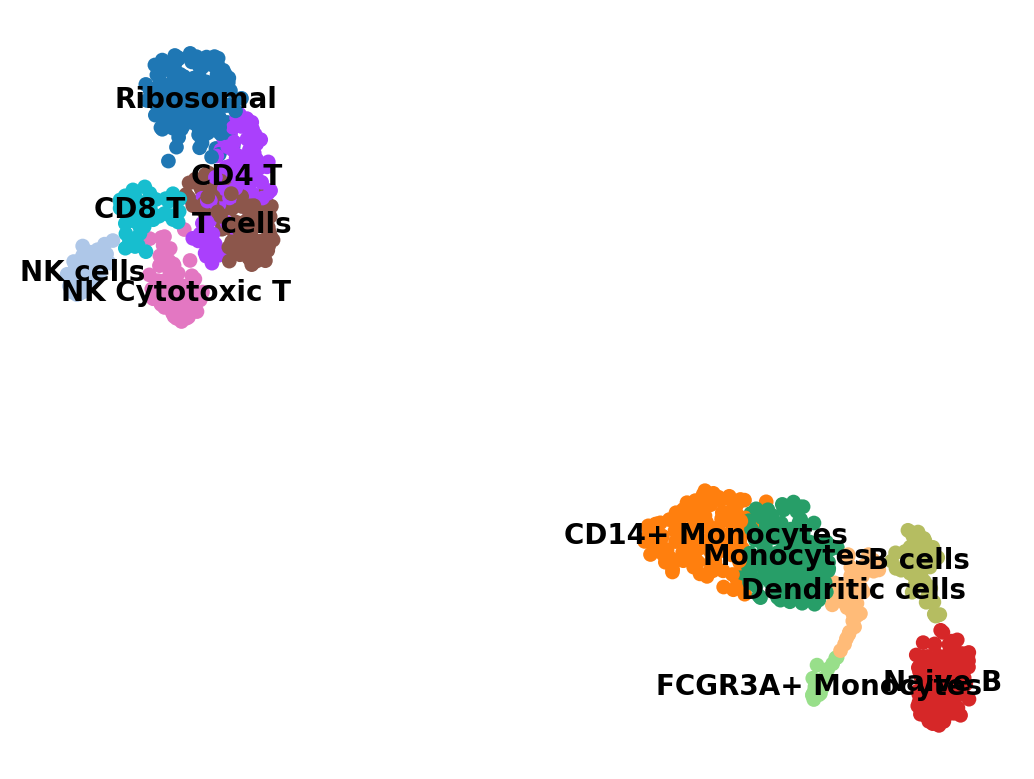

In [116]:
sc.pl.umap(umHVG_data, color="leiden_1.6", legend_loc="on data", title="", frameon=False, save=".pdf")

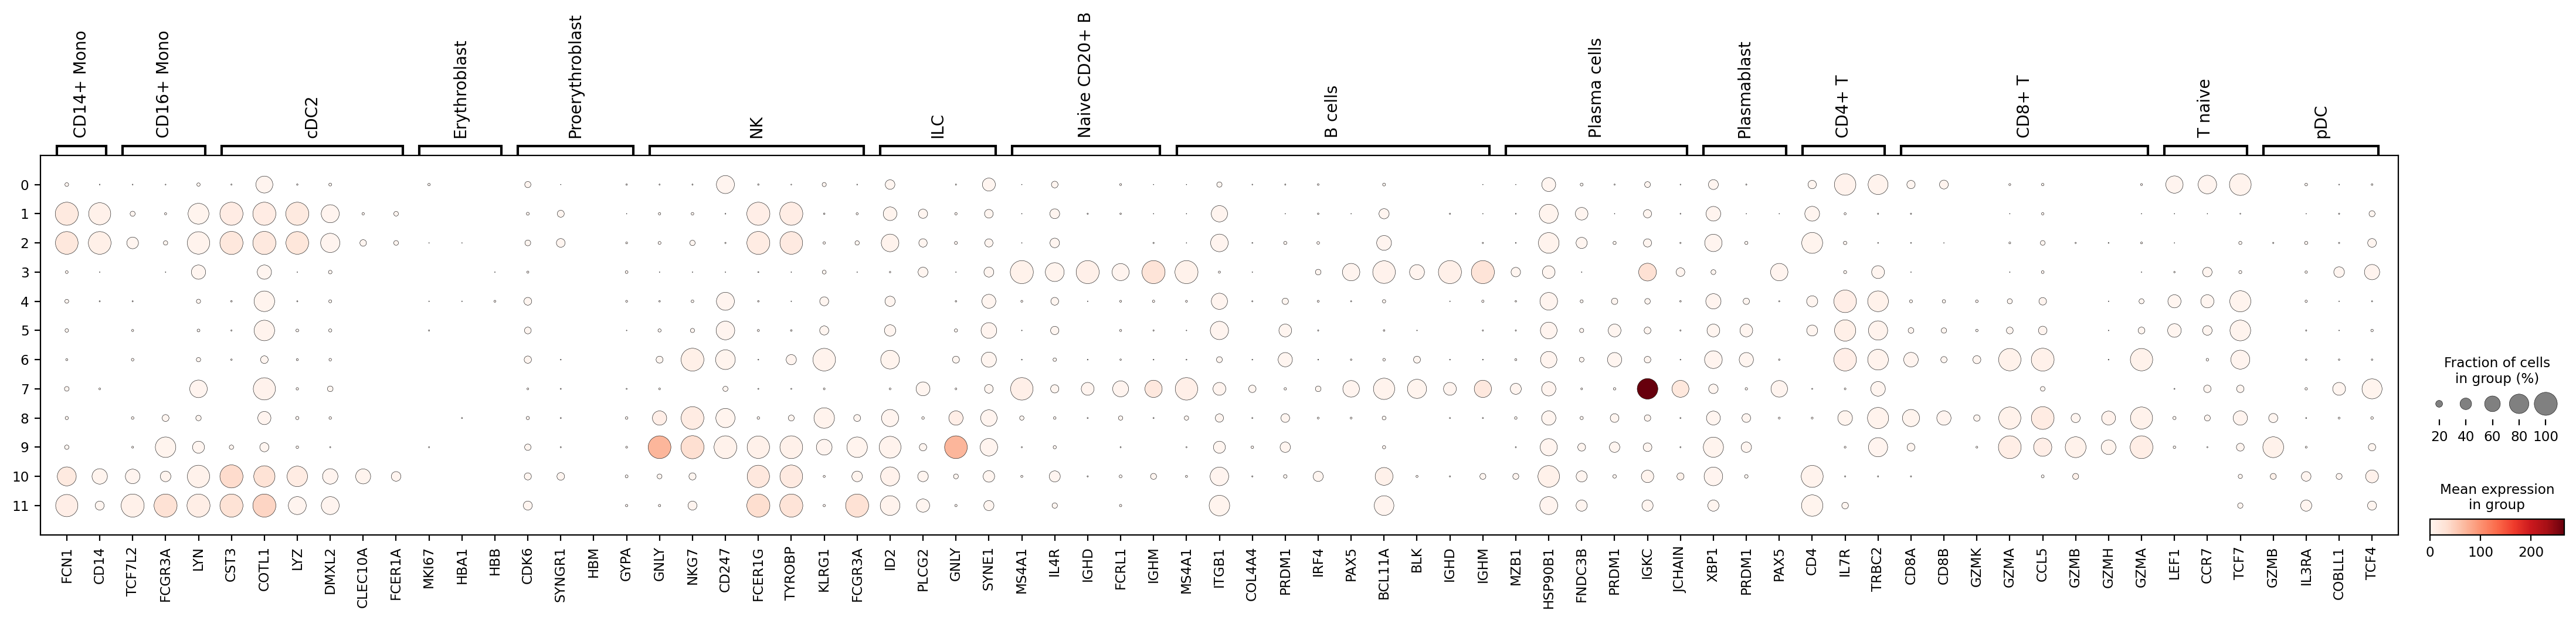

In [140]:
sc.pl.dotplot(umHVG_data, marker_genes, groupby="leiden_1.6")

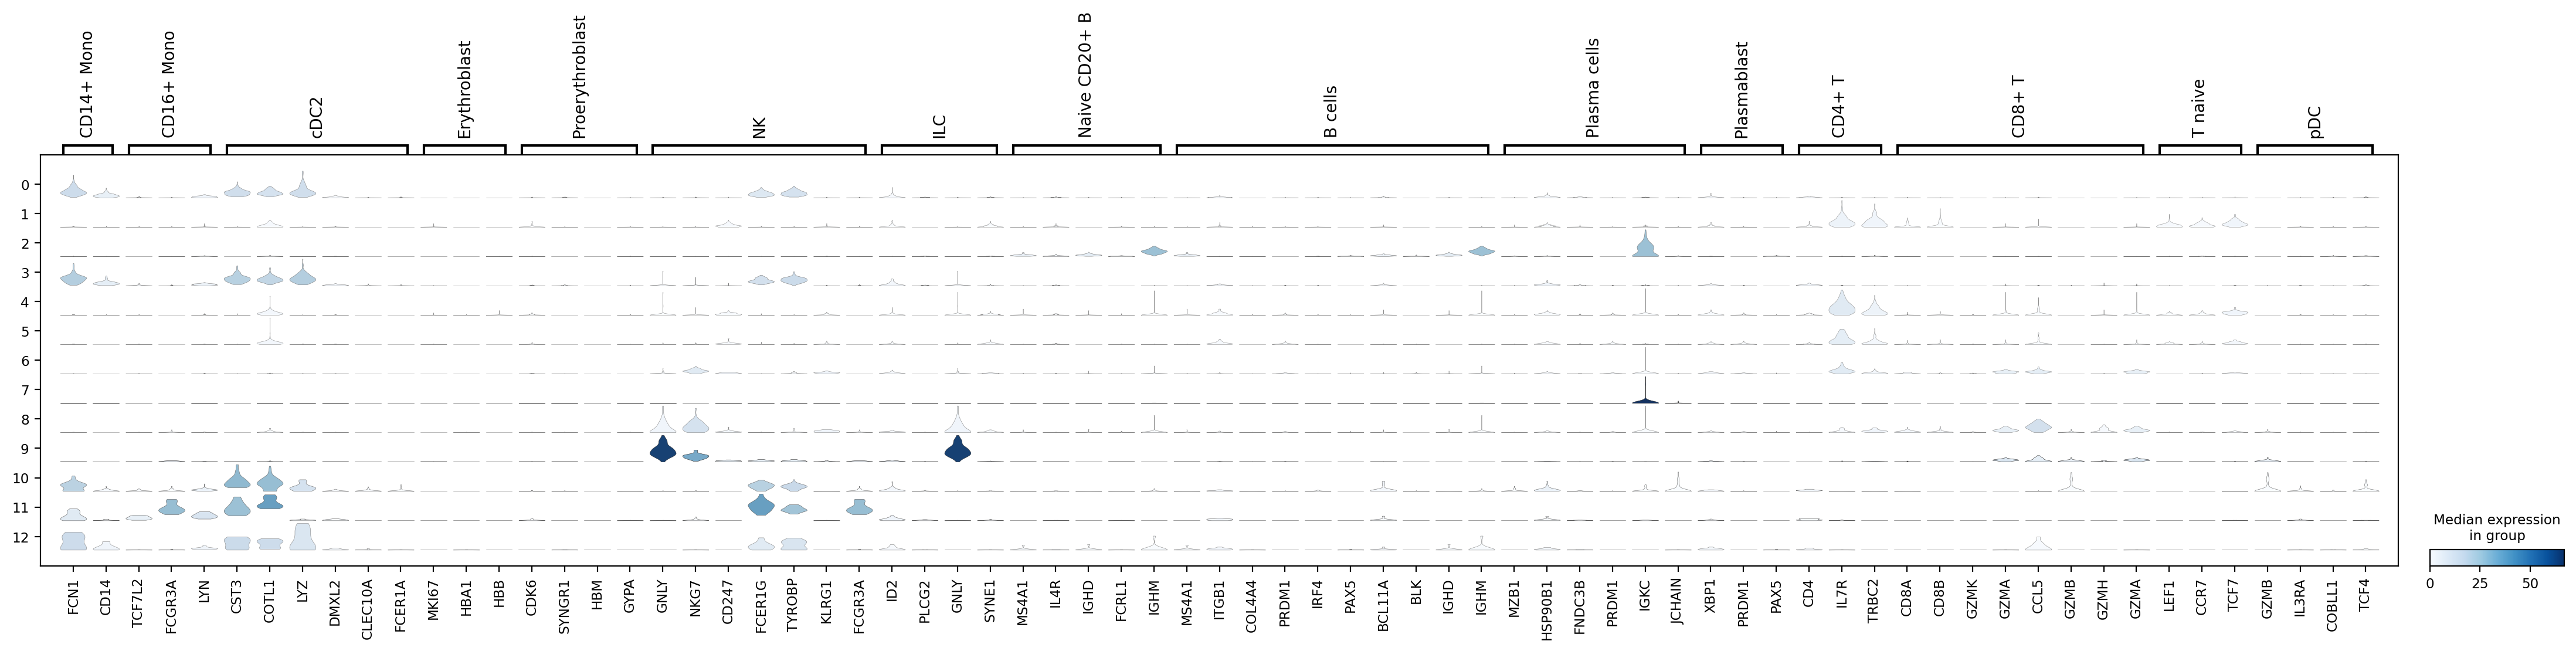

In [141]:
sc.pl.stacked_violin(umHVG_data, marker_genes, groupby="leiden")